## Visualizing CNNs

In [1]:
from tensorflow import keras

model = keras.applications.VGG16()
model.summary()

553467096/553467096 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [2]:
!wget https://www.hillspet.com/content/dam/cp-sites/hills/hills-pet/en_us/exported/cat-care/images/cat-walking-across-window-sill-SW.jpg

--2023-02-25 07:08:02--  https://www.hillspet.com/content/dam/cp-sites/hills/hills-pet/en_us/exported/cat-care/images/cat-walking-across-window-sill-SW.jpg
Resolving www.hillspet.com (www.hillspet.com)... 23.40.99.42, 23.40.99.47, 2600:1407:5800::6011:b2b
Connecting to www.hillspet.com (www.hillspet.com)|23.40.99.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105507 (103K) [image/jpeg]
Saving to: ‘cat-walking-across-window-sill-SW.jpg’

cat-walking-across- 100%[===================>] 103.03K  --.-KB/s    in 0.07s   

2023-02-25 07:08:02 (1.38 MB/s) - ‘cat-walking-across-window-sill-SW.jpg’ saved [105507/105507]



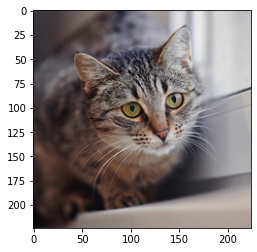

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

img = Image.open('cat.jpg').resize((300,224),Image.LANCZOS)
img = np.array(img)
img = img[:,30:224+30,:]
plt.imshow(img)

In [30]:
im = tf.expand_dims(keras.applications.vgg16.preprocess_input(img),axis=0)
res = model(im).numpy()
keras.applications.vgg16.decode_predictions(res)

[[('n02123045', 'tabby', 0.41937375),
  ('n02123159', 'tiger_cat', 0.38666293),
  ('n02124075', 'Egyptian_cat', 0.12674229),
  ('n02971356', 'carton', 0.007628071),
  ('n07930864', 'cup', 0.005645088)]]

In [31]:
layers = ['block1_conv1', 'block3_conv1', 'block5_conv3']

layer_outputs = [ model.get_layer(n).output for n in layers ]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [32]:
res = activation_model(im)

In [23]:
res[0].shape

TensorShape([1, 224, 224, 64])

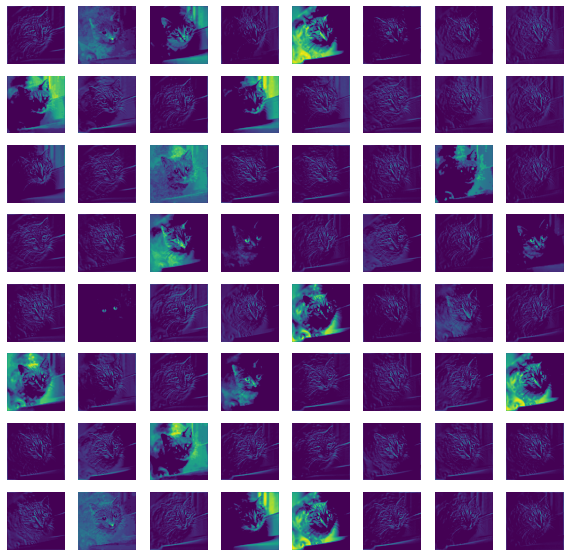

In [25]:
fig,ax = plt.subplots(8,8,figsize=(10,10))
for i in range(8):
  for j in range(8):
    ax[i,j].imshow(res[0][0,:,:,i+8*j])
    ax[i,j].axis('off')
plt.show()

In [38]:
res[1].shape
t = res[1][0].numpy()
t.shape

(56, 56, 256)

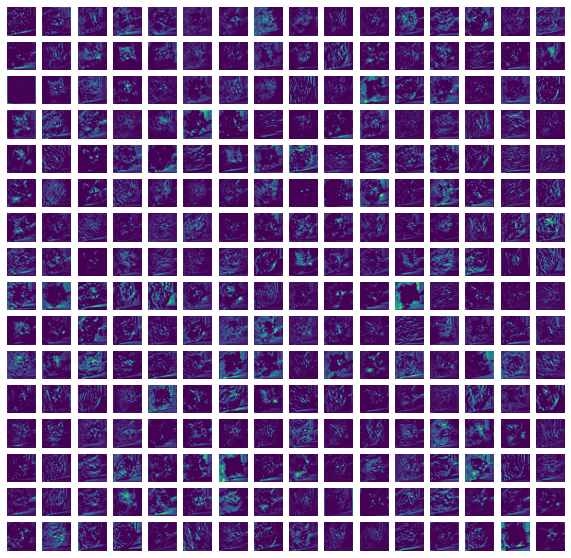

In [39]:
fig,ax = plt.subplots(16,16,figsize=(10,10))
for i in range(16):
  for j in range(16):
    ax[i,j].imshow(t[:,:,i+16*j])
    ax[i,j].axis('off')
plt.show()

In [40]:
t = res[2][0].numpy()
t.shape

(14, 14, 512)

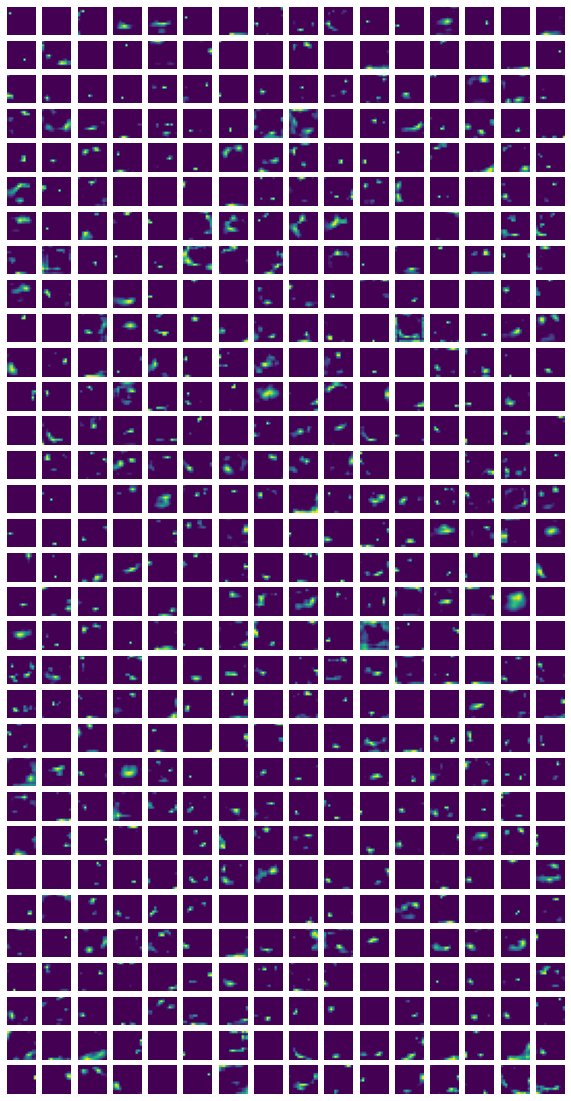

In [42]:
fig,ax = plt.subplots(32,16,figsize=(10,20))
for i in range(16):
  for j in range(32):
    ax[j,i].imshow(t[:,:,i+16*j])
    ax[j,i].axis('off')
plt.show()

## Semantic Segmentation

In [43]:
!wget http://www.soshnikov.com/permanent/data/PH2Dataset.rar
!unrar x -Y PH2Dataset.rar

--2023-02-25 07:42:00--  http://www.soshnikov.com/permanent/data/PH2Dataset.rar
Resolving www.soshnikov.com (www.soshnikov.com)... 79.137.227.122
Connecting to www.soshnikov.com (www.soshnikov.com)|79.137.227.122|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116457882 (111M) [text/plain]
Saving to: ‘PH2Dataset.rar’

PH2Dataset.rar      100%[===================>] 111.06M   237KB/s    in 8m 6s   

2023-02-25 07:50:07 (234 KB/s) - ‘PH2Dataset.rar’ saved [116457882/116457882]


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from PH2Dataset.rar

Creating    PH2Dataset                                                OK
Extracting  PH2Dataset/PH2_dataset.txt                                     0%  OK 
Extracting  PH2Dataset/PH2_dataset.xlsx                                    0%  OK 
Extracting  PH2Dataset/Readme.txt                                          0%  OK 
Creating    PH2Dataset/PH2 Dataset ima

In [46]:
import tensorflow_datasets as tdfs

dataset, info = tdfs.load('oxford_iiit_pet:3.*.*', with_info=True)
dataset

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3680 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteX2BLD3/oxford_iiit_pet-train.tfrecord*...:…

Generating test examples...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/3.2.0.incompleteX2BLD3/oxford_iiit_pet-test.tfrecord*...: …

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.


{'train': <PrefetchDataset element_spec={'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>,
 'test': <PrefetchDataset element_spec={'file_name': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None), 'segmentation_mask': TensorSpec(shape=(None, None, 1), dtype=tf.uint8, name=None), 'species': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [2]:
def display_images(l,titles=None,fontsize=12):
    n=len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
        if titles is not None:
            ax[i].set_title(titles[i],fontsize=fontsize)
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()

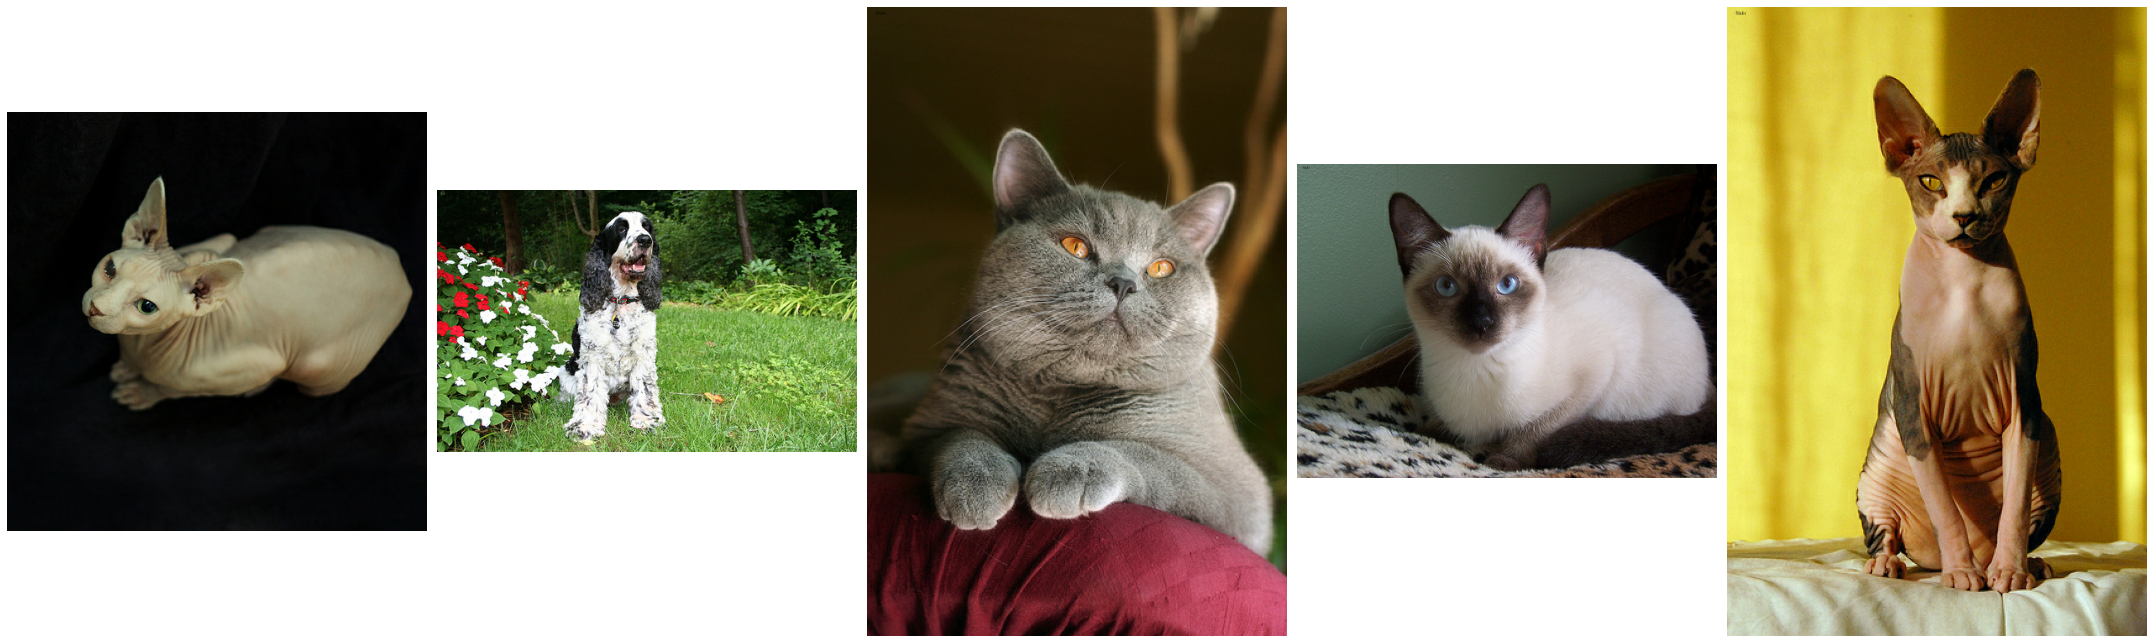

In [49]:
display_images([x['image'] for _,x in zip(range(5),dataset['train'])])

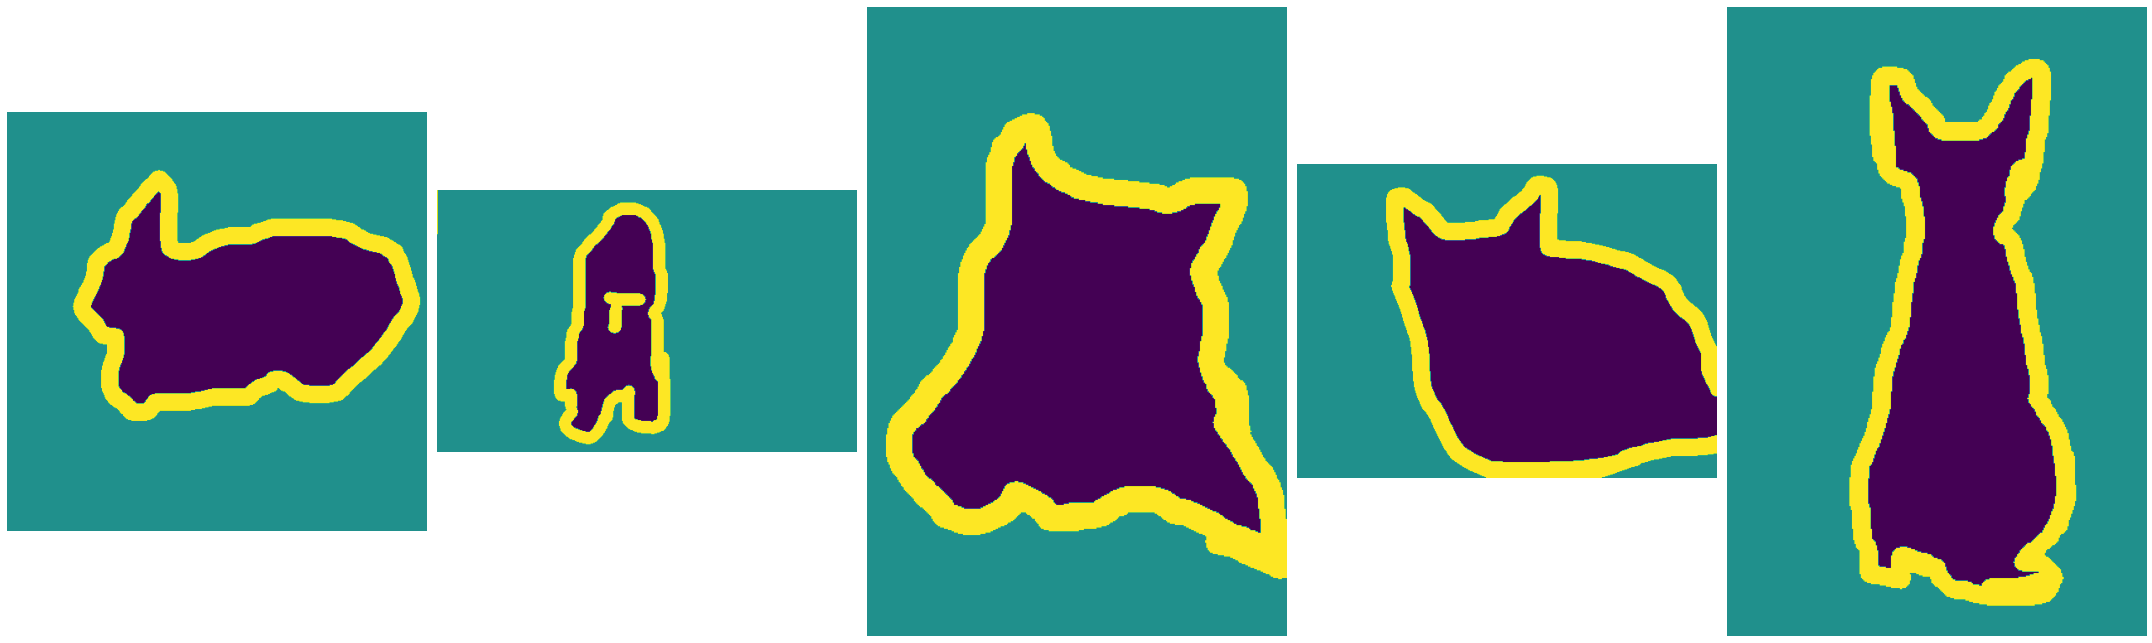

In [50]:
display_images([x['segmentation_mask'] for _,x in zip(range(5),dataset['train'])])

In [51]:
def load_image(x):
  input_image = tf.image.resize(x['image'], (128, 128))/255.0
  input_mask = tf.image.resize(x['segmentation_mask'], (128, 128))-1
  return input_image, input_mask

train_images = dataset['train'].map(load_image)
test_images = dataset['test'].map(load_image)

In [52]:
for x,m in train_images:
  print(x.shape,m.shape)
  break

(128, 128, 3) (128, 128, 1)


In [57]:
model = keras.models.Sequential([
    keras.layers.Conv2D(10,5,input_shape=(128,128,3),activation='relu',padding='same'),
    keras.layers.Conv2D(20,5,activation='relu',padding='same'),
    keras.layers.Conv2D(3,1,activation=None,padding='same')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 128, 128, 10)      760       
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 20)      5020      
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 3)       63        
                                                                 
Total params: 5,843
Trainable params: 5,843
Non-trainable params: 0
_________________________________________________________________


In [58]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile('adam',loss,['acc'])

train_batch = train_images.cache().shuffle(1000).batch(32)
test_batch = test_images.cache().shuffle(1000).batch(32)

hist = model.fit(train_batch,validation_data=test_batch,epochs=10)

Epoch 1/10
115/115 [==============================] - 25s 186ms/step - loss: 0.9175 - acc: 0.5771 - val_loss: 0.8940 - val_acc: 0.5718
Epoch 2/10
115/115 [==============================] - 3s 25ms/step - loss: 0.8581 - acc: 0.5800 - val_loss: 0.8418 - val_acc: 0.5765
Epoch 3/10
115/115 [==============================] - 3s 24ms/step - loss: 0.8151 - acc: 0.5982 - val_loss: 0.8052 - val_acc: 0.6044
Epoch 4/10
115/115 [==============================] - 3s 27ms/step - loss: 0.7917 - acc: 0.6174 - val_loss: 0.7907 - val_acc: 0.6183
Epoch 5/10
115/115 [==============================] - 3s 26ms/step - loss: 0.7818 - acc: 0.6263 - val_loss: 0.7891 - val_acc: 0.6174
Epoch 6/10
115/115 [==============================] - 3s 25ms/step - loss: 0.7714 - acc: 0.6337 - val_loss: 0.7706 - val_acc: 0.6315
Epoch 7/10
115/115 [==============================] - 3s 28ms/step - loss: 0.7650 - acc: 0.6387 - val_loss: 0.7604 - val_acc: 0.6426
Epoch 8/10
115/115 [==============================] - 3s 25ms/step 

In [69]:
def plot_results(test_batch):
  for x,y in test_batch:
    break

  pred = model.predict(x[:5])
  pred = tf.argmax(pred,axis=-1)

  fig,ax = plt.subplots(5,3,figsize=(10,10))
  for i,(x,y,p) in enumerate(zip(x[:5],y[:5],pred[:5])):
    ax[i,0].imshow(x)
    ax[i,0].axis('off')
    ax[i,1].imshow(p)
    ax[i,0].axis('off')
    ax[i,2].imshow(y)
    ax[i,0].axis('off')

In [67]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,3,padding='same',activation='relu',input_shape=(128,128,3)),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(128,3,padding='same',activation='relu'),

    keras.layers.UpSampling2D(interpolation='bilinear'),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.UpSampling2D(interpolation='bilinear'),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.UpSampling2D(interpolation='bilinear'),
    keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    keras.layers.Conv2D(3,1,activation=None,padding='same')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)      

In [68]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile('adam',loss,['acc'])

hist = model.fit(train_batch,validation_data=test_batch,epochs=10)

Epoch 1/10
115/115 [==============================] - 11s 57ms/step - loss: 0.7878 - acc: 0.6553 - val_loss: 0.7263 - val_acc: 0.6994
Epoch 2/10
115/115 [==============================] - 5s 45ms/step - loss: 0.6735 - acc: 0.7134 - val_loss: 0.6313 - val_acc: 0.7329
Epoch 3/10
115/115 [==============================] - 5s 47ms/step - loss: 0.6060 - acc: 0.7415 - val_loss: 0.5684 - val_acc: 0.7616
Epoch 4/10
115/115 [==============================] - 5s 46ms/step - loss: 0.5659 - acc: 0.7609 - val_loss: 0.6011 - val_acc: 0.7455
Epoch 5/10
115/115 [==============================] - 5s 47ms/step - loss: 0.5378 - acc: 0.7738 - val_loss: 0.5116 - val_acc: 0.7860
Epoch 6/10
115/115 [==============================] - 7s 57ms/step - loss: 0.5168 - acc: 0.7836 - val_loss: 0.5013 - val_acc: 0.7925
Epoch 7/10
115/115 [==============================] - 6s 56ms/step - loss: 0.4995 - acc: 0.7910 - val_loss: 0.5057 - val_acc: 0.7893
Epoch 8/10
115/115 [==============================] - 5s 48ms/step -

1/1 [==============================] - 0s 395ms/step


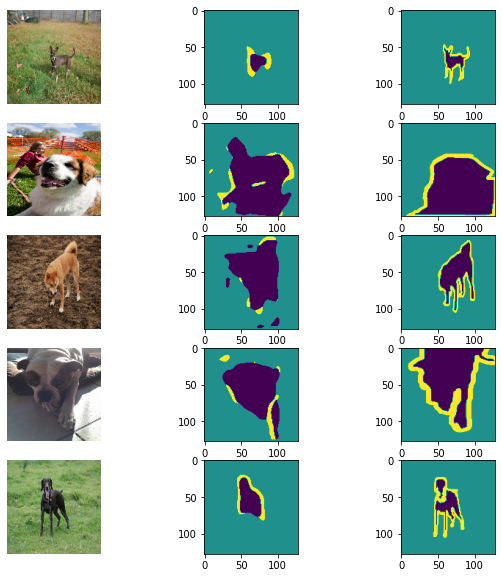

In [70]:
plot_results(test_batch)

In [94]:
class SegNet(tf.keras.Model): # упрощённый SegNet
    def __init__(self):
        super().__init__()
        self.enc_conv0 = keras.layers.Conv2D(16, kernel_size=3, padding='same')
        self.bn0 = keras.layers.BatchNormalization()
        self.pool0 = keras.layers.MaxPool2D()

        self.enc_conv1 = keras.layers.Conv2D(32, kernel_size=3, padding='same')
        self.bn1 = keras.layers.BatchNormalization()
        self.pool1 = keras.layers.MaxPool2D()

        self.enc_conv2 = keras.layers.Conv2D(64, kernel_size=3, padding='same')
        self.bn2 = keras.layers.BatchNormalization()
        self.pool2 = keras.layers.MaxPool2D()

        self.bottleneck_conv = keras.layers.Conv2D(128, kernel_size=(3, 3), padding='same')

        self.upsample1 =  keras.layers.UpSampling2D(interpolation='bilinear')
        self.dec_conv1 = keras.layers.Conv2D(64, kernel_size=3, padding='same')
        self.dec_bn1 = keras.layers.BatchNormalization()

        self.upsample2 =  keras.layers.UpSampling2D(interpolation='bilinear')
        self.dec_conv2 = keras.layers.Conv2D(32, kernel_size=3, padding='same')
        self.dec_bn2 = keras.layers.BatchNormalization()

        self.upsample3 =  keras.layers.UpSampling2D(interpolation='bilinear')
        self.dec_conv3 = keras.layers.Conv2D(3, kernel_size=1)

    def call(self, input):
        e0 = self.pool0(tf.nn.relu(self.bn0(self.enc_conv0(input))))
        e1 = self.pool1(tf.nn.relu(self.bn1(self.enc_conv1(e0))))
        e2 = self.pool2(tf.nn.relu(self.bn2(self.enc_conv2(e1))))

        b = self.bottleneck_conv(e2)

        d1 = tf.nn.relu(self.dec_bn1(self.upsample1(self.dec_conv1(b))))
        d2 = tf.nn.relu(self.dec_bn2(self.upsample2(self.dec_conv2(d1))))
        d3 = self.dec_conv3(self.upsample3(d2))

        return d3

In [95]:
model = SegNet()
model.build(input_shape=(None,128,128,3))
model.summary()

Model: "seg_net_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_97 (Conv2D)          multiple                  448       
                                                                 
 batch_normalization_61 (Bat  multiple                 64        
 chNormalization)                                                
                                                                 
 max_pooling2d_38 (MaxPoolin  multiple                 0         
 g2D)                                                            
                                                                 
 conv2d_98 (Conv2D)          multiple                  4640      
                                                                 
 batch_normalization_62 (Bat  multiple                 128       
 chNormalization)                                                
                                                        

In [96]:

loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile('adam',loss,['acc'])

hist = model.fit(train_batch,validation_data=test_batch,epochs=10)

Epoch 1/10
115/115 [==============================] - 9s 38ms/step - loss: 0.6923 - acc: 0.7062 - val_loss: 0.9003 - val_acc: 0.5795
Epoch 2/10
115/115 [==============================] - 5s 48ms/step - loss: 0.5458 - acc: 0.7716 - val_loss: 0.7178 - val_acc: 0.6980
Epoch 3/10
115/115 [==============================] - 4s 36ms/step - loss: 0.4989 - acc: 0.7918 - val_loss: 0.6895 - val_acc: 0.6929
Epoch 4/10
115/115 [==============================] - 4s 35ms/step - loss: 0.4673 - acc: 0.8053 - val_loss: 0.6004 - val_acc: 0.7515
Epoch 5/10
115/115 [==============================] - 5s 44ms/step - loss: 0.4480 - acc: 0.8133 - val_loss: 0.4656 - val_acc: 0.8071
Epoch 6/10
115/115 [==============================] - 4s 35ms/step - loss: 0.4408 - acc: 0.8161 - val_loss: 0.5654 - val_acc: 0.7632
Epoch 7/10
115/115 [==============================] - 5s 47ms/step - loss: 0.4302 - acc: 0.8210 - val_loss: 0.4694 - val_acc: 0.8058
Epoch 8/10
115/115 [==============================] - 4s 35ms/step - 

1/1 [==============================] - 1s 875ms/step


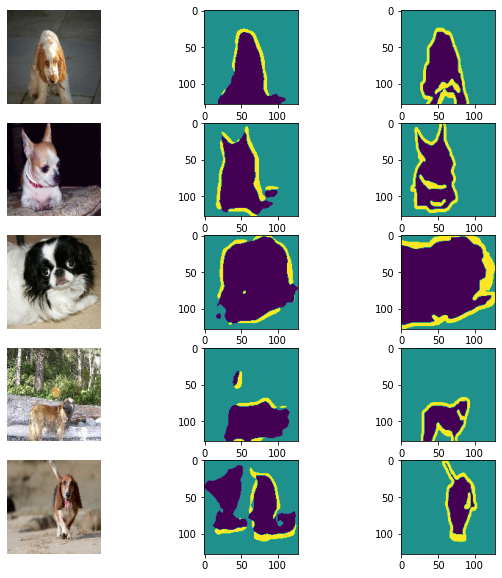

In [97]:
plot_results(test_batch)

In [101]:
class UNet(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.enc_conv0 = keras.layers.Conv2D(16, kernel_size=3, padding='same')
        self.bn0 = keras.layers.BatchNormalization()
        self.pool0 = keras.layers.MaxPool2D()

        self.enc_conv1 = keras.layers.Conv2D(32, kernel_size=3, padding='same')
        self.bn1 = keras.layers.BatchNormalization()
        self.pool1 = keras.layers.MaxPool2D()

        self.enc_conv2 = keras.layers.Conv2D(64, kernel_size=3, padding='same')
        self.bn2 = keras.layers.BatchNormalization()
        self.pool2 = keras.layers.MaxPool2D()

        self.bn3 = keras.layers.BatchNormalization()

        self.bottleneck_conv = keras.layers.Conv2D(128, kernel_size=(3, 3), padding='same')

        self.upsample1 =  keras.layers.UpSampling2D(interpolation='bilinear')
        self.dec_conv1 = keras.layers.Conv2D(64, kernel_size=3, padding='same')
        self.dec_bn1 = keras.layers.BatchNormalization()

        self.upsample2 =  keras.layers.UpSampling2D(interpolation='bilinear')
        self.dec_conv2 = keras.layers.Conv2D(32, kernel_size=3, padding='same')
        self.dec_bn2 = keras.layers.BatchNormalization()

        self.upsample3 =  keras.layers.UpSampling2D(interpolation='bilinear')
        self.dec_conv3 = keras.layers.Conv2D(3, kernel_size=1)
        self.dec_bn3 = keras.layers.BatchNormalization()

    def call(self, input):
        c0 = tf.nn.relu(self.bn0(self.enc_conv0(input)))
        e0 = self.pool0(c0)
        c1 = tf.nn.relu(self.bn1(self.enc_conv1(e0)))
        e1 = self.pool1(c1)
        c2 = tf.nn.relu(self.bn2(self.enc_conv2(e1)))
        e2 = self.pool2(c2)

        b = self.bottleneck_conv(e2)

        u1 = self.upsample1(b)
        b1 = tf.concat([u1,c2],axis=3)
        d1 = tf.nn.relu(self.dec_bn1(self.dec_conv1(b1)))
        b2 = tf.concat([self.upsample2(d1),c1],axis=3)
        d2 = tf.nn.relu(self.dec_bn2(self.dec_conv2(b2)))
        b3 = tf.concat([self.upsample3(d2),c0],axis=3)
        d3 = tf.nn.relu(self.dec_bn3(self.dec_conv3(b3)))

        return d3

In [102]:
model = UNet()
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile('adam',loss,['acc'])

hist = model.fit(train_batch,validation_data=test_batch,epochs=10)

Epoch 1/10
115/115 [==============================] - 9s 40ms/step - loss: 0.3991 - acc: 0.8336 - val_loss: 0.4220 - val_acc: 0.8276
Epoch 2/10
115/115 [==============================] - 4s 35ms/step - loss: 0.3919 - acc: 0.8368 - val_loss: 0.5572 - val_acc: 0.7685
Epoch 3/10
115/115 [==============================] - 4s 35ms/step - loss: 0.3873 - acc: 0.8380 - val_loss: 0.4906 - val_acc: 0.7958
Epoch 4/10
115/115 [==============================] - 4s 37ms/step - loss: 0.3752 - acc: 0.8429 - val_loss: 0.4250 - val_acc: 0.8241
Epoch 5/10
115/115 [==============================] - 4s 35ms/step - loss: 0.3671 - acc: 0.8465 - val_loss: 0.4140 - val_acc: 0.8306
Epoch 6/10
115/115 [==============================] - 4s 35ms/step - loss: 0.3638 - acc: 0.8481 - val_loss: 0.4389 - val_acc: 0.8187
Epoch 7/10
115/115 [==============================] - 4s 37ms/step - loss: 0.3599 - acc: 0.8495 - val_loss: 0.4166 - val_acc: 0.8281
Epoch 8/10
115/115 [==============================] - 4s 35ms/step - 

1/1 [==============================] - 0s 30ms/step


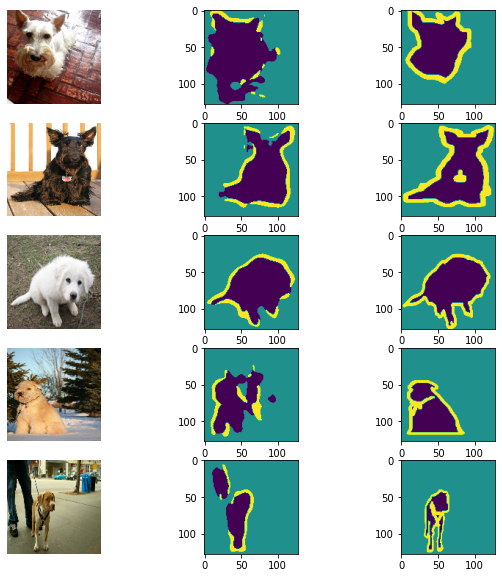

In [104]:
plot_results(test_batch)

## Autoencoders

In [1]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_trainclass), (x_test, y_testclass) = keras.datasets.mnist.load_data()

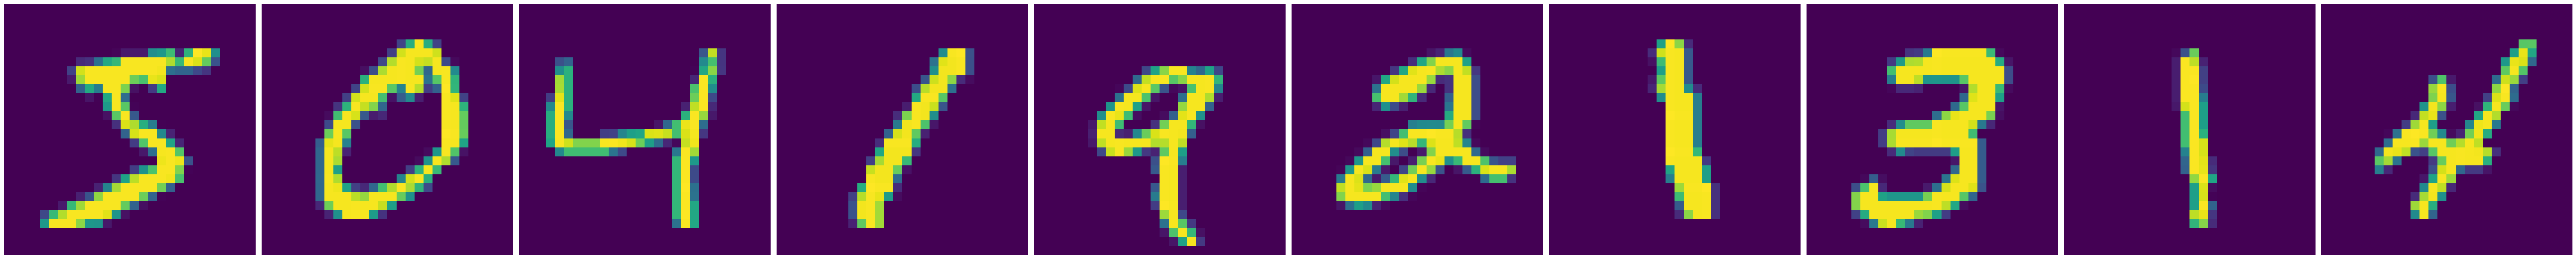

In [108]:
display_images(x_train[:10])

In [111]:
input_img = keras.Input(shape=(28,28,1))

x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

encoder = keras.models.Model(input_img,encoded)

encoder.summary()

latent = keras.Input(shape=(4,4,8))

x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(latent)
x = keras.layers.UpSampling2D((2, 2),interpolation='bilinear')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2),interpolation='bilinear')(x)
x = keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = keras.layers.UpSampling2D((2, 2),interpolation='bilinear')(x)
decoded = keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

decoder = keras.models.Model(latent,decoded)
decoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_114 (Conv2D)         (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_115 (Conv2D)         (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_116 (Conv2D)         (None, 7, 7, 8)           584 

In [119]:
autoencoder = keras.models.Model(input_img,decoder(encoder(input_img)))
autoencoder.compile('adam','binary_crossentropy')

In [3]:
x_trainf = np.expand_dims(x_train,axis=-1).astype('float32') / 255.
x_testf = np.expand_dims(x_test,axis=-1).astype('float32') / 255.
x_trainf.shape

(60000, 28, 28, 1)

In [122]:
autoencoder.fit(x_trainf, x_trainf,
                epochs=25,
                batch_size=128,
                shuffle=True)

Epoch 1/25
469/469 [==============================] - 6s 8ms/step - loss: 0.1336
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1308
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1282
Epoch 4/25
469/469 [==============================] - 4s 8ms/step - loss: 0.1258
Epoch 5/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1236
Epoch 6/25
469/469 [==============================] - 4s 8ms/step - loss: 0.1214
Epoch 7/25
469/469 [==============================] - 5s 10ms/step - loss: 0.1194
Epoch 8/25
469/469 [==============================] - 7s 14ms/step - loss: 0.1174
Epoch 9/25
469/469 [==============================] - 6s 12ms/step - loss: 0.1155
Epoch 10/25
469/469 [==============================] - 4s 9ms/step - loss: 0.1137
Epoch 11/25
469/469 [==============================] - 5s 10ms/step - loss: 0.1121
Epoch 12/25
469/469 [==============================] - 5s 12ms/step - loss: 0.1107
Epoch 13/25
469/469 

1/1 [==============================] - 0s 29ms/step


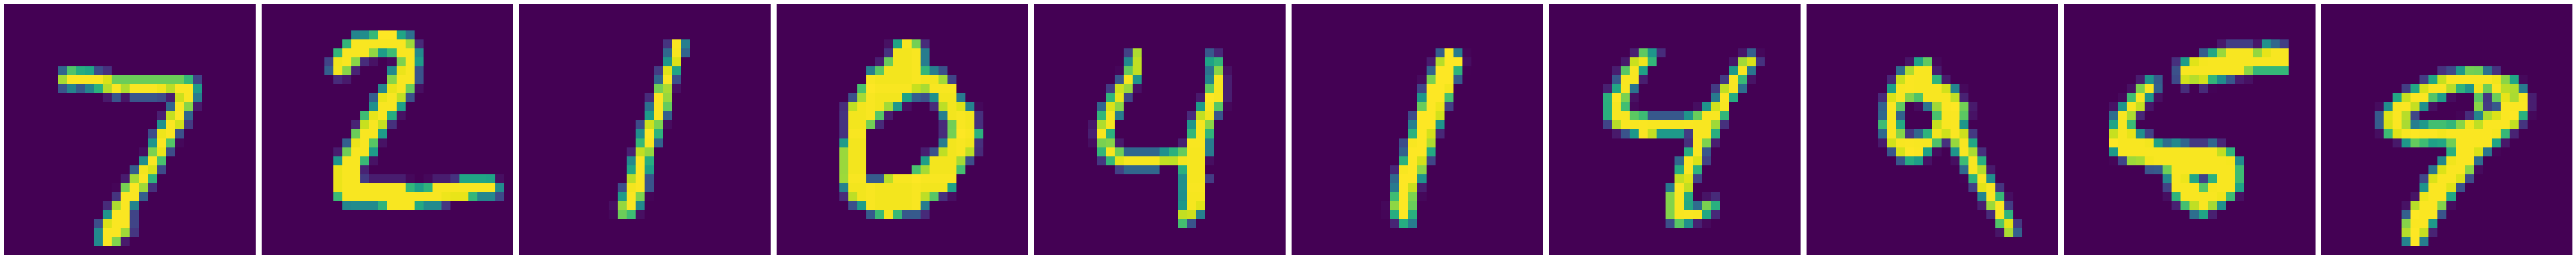

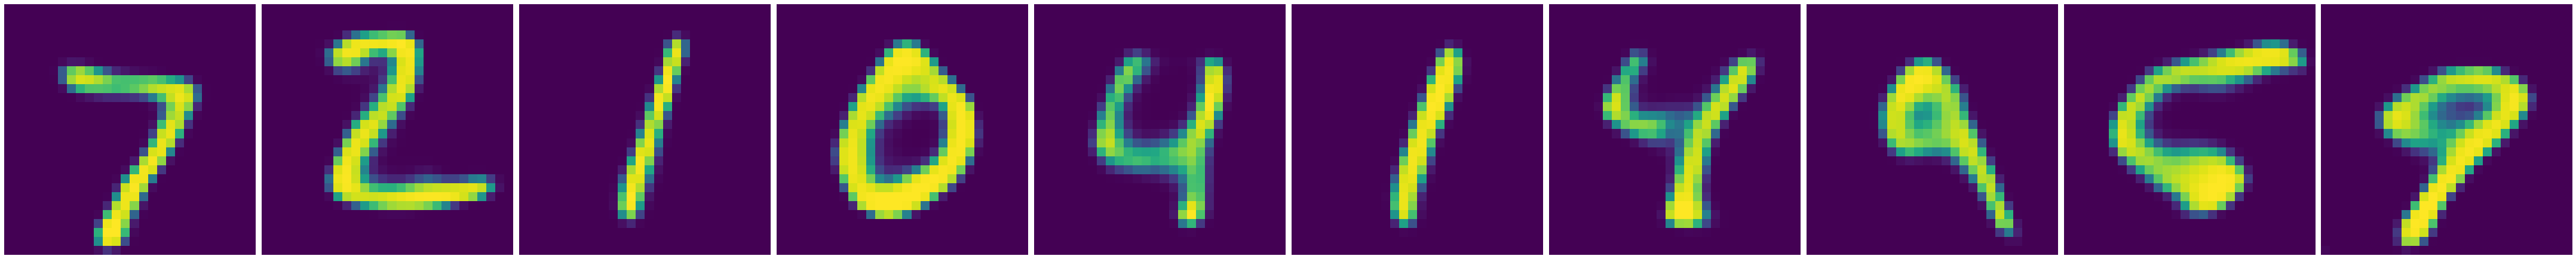

In [124]:
p_test = autoencoder.predict(x_testf[:10])
display_images(x_test[:10])
display_images(p_test[:10])

1/1 [==============================] - 0s 102ms/step


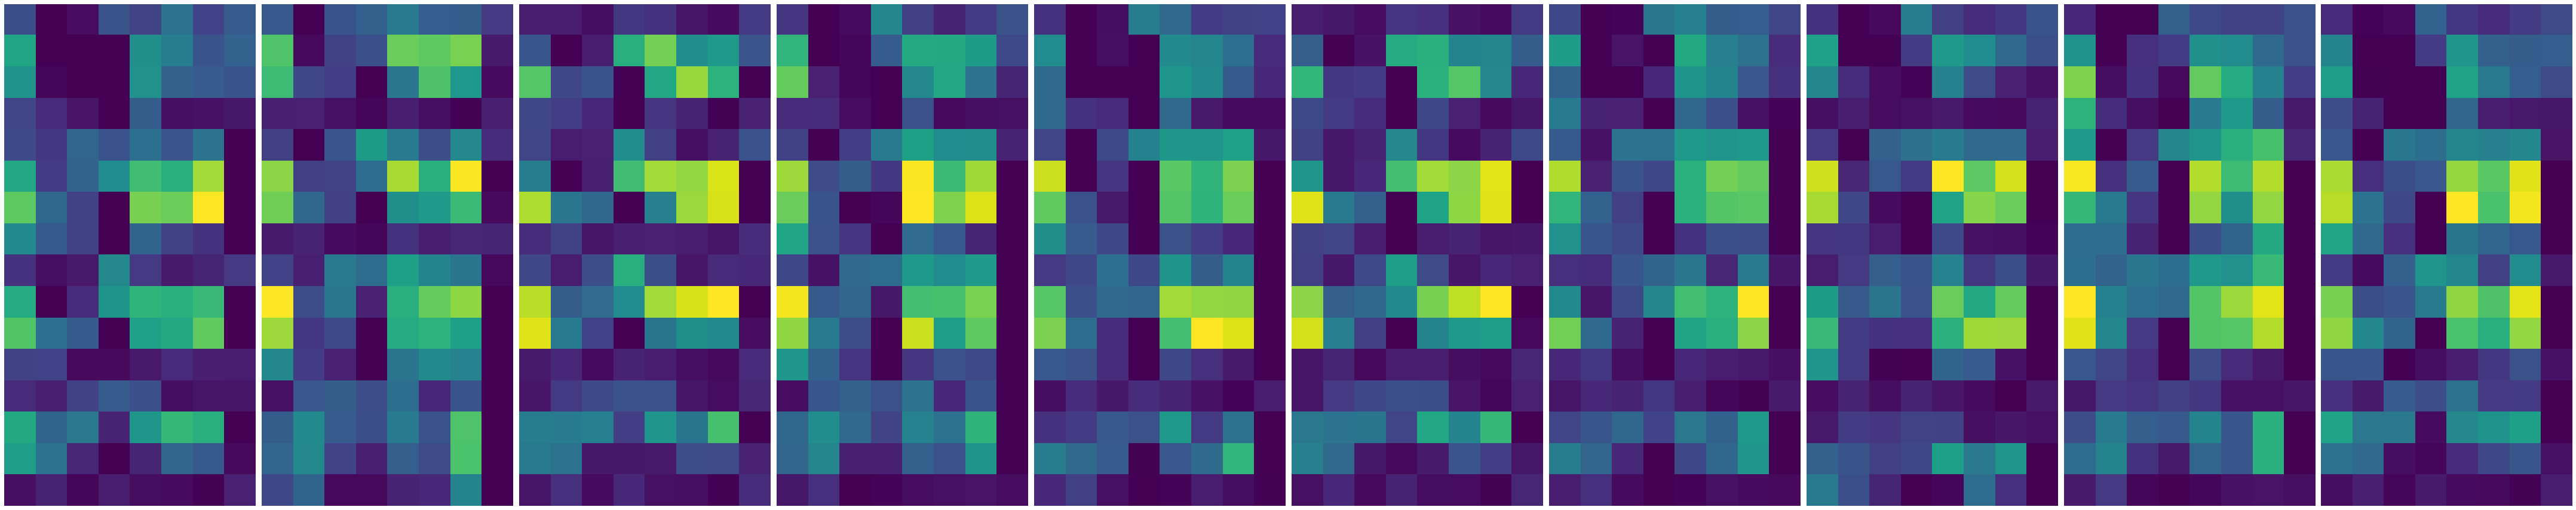

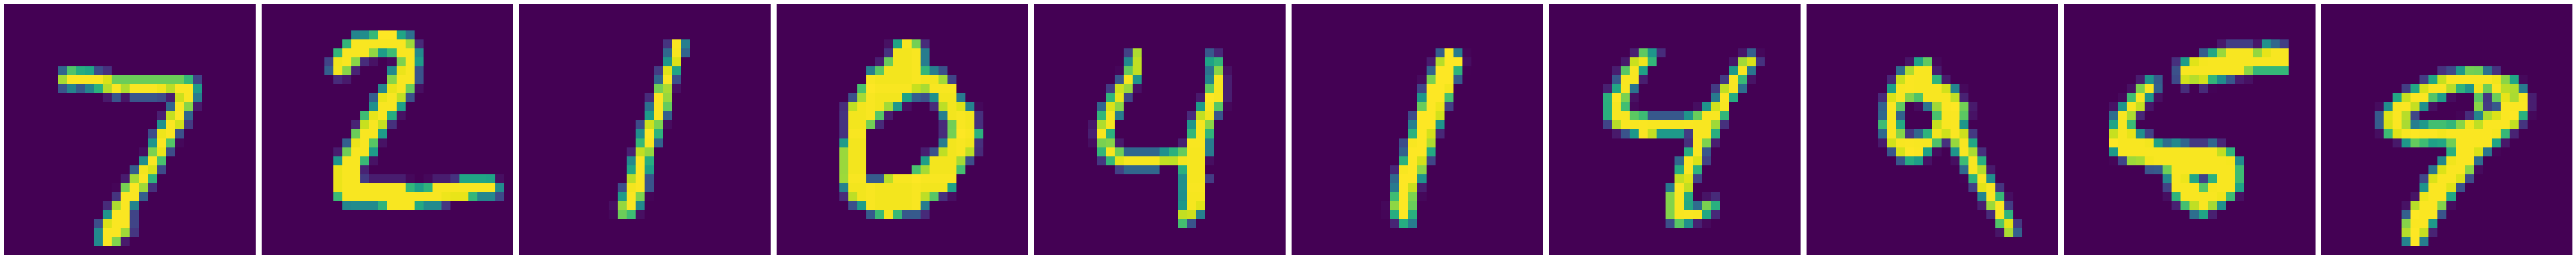

In [127]:
encoded_imgs = encoder.predict(x_testf[:10])
display_images(encoded_imgs.reshape(10,16,8))
display_images(x_testf[:10])

1/1 [==============================] - 0s 85ms/step


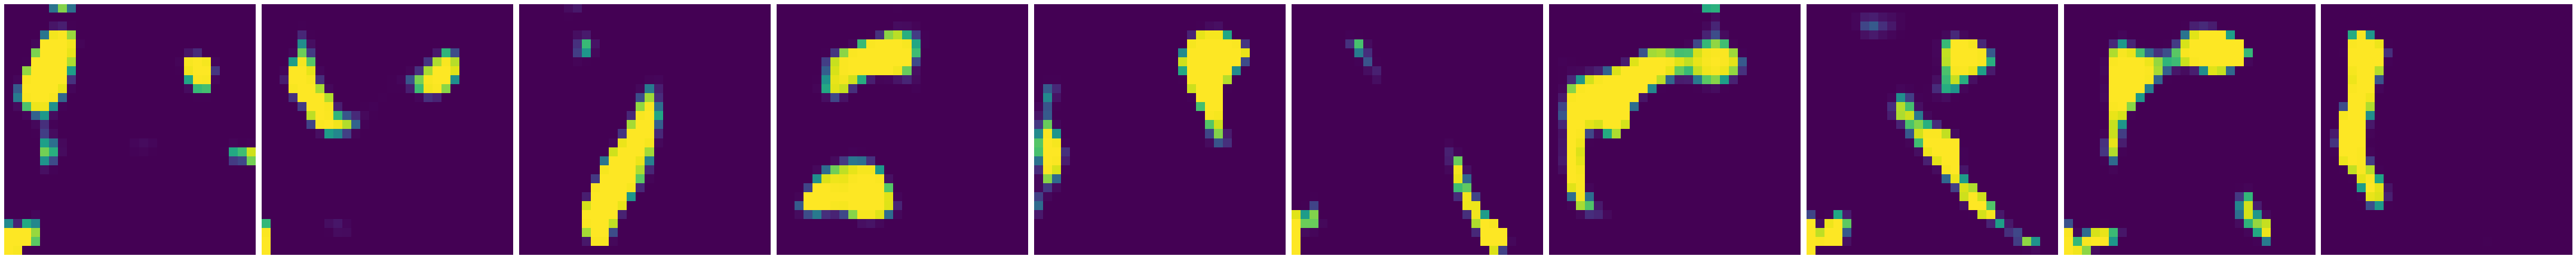

In [130]:
res = decoder.predict(23*tf.random.uniform(shape=(10,4,4,8)))
display_images(res)

1/1 [==============================] - 0s 32ms/step


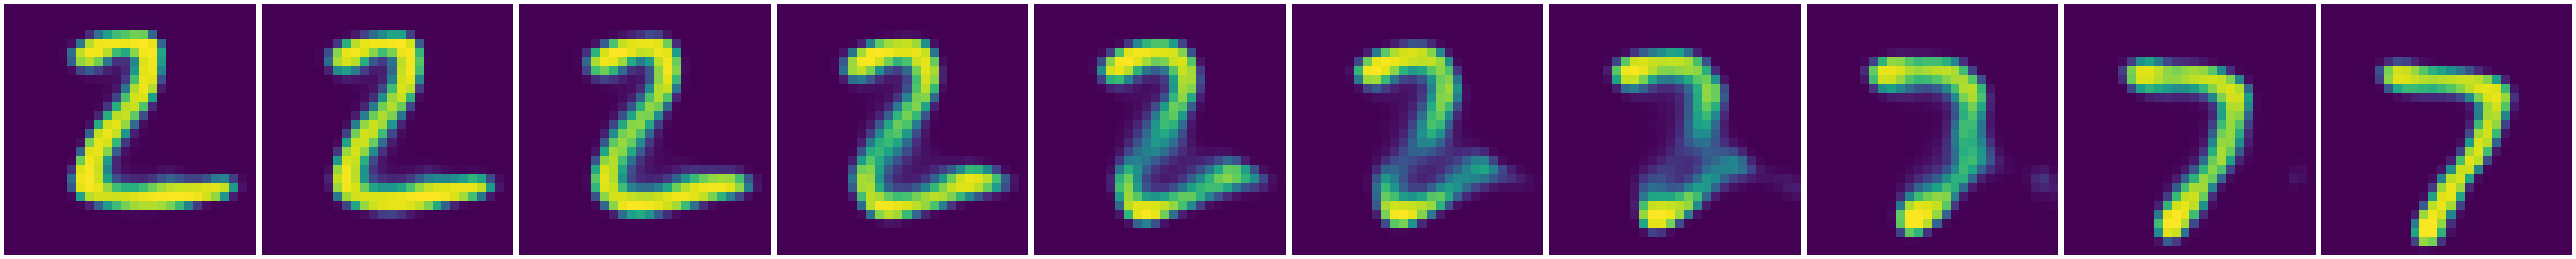

In [138]:
latents = [ encoded_imgs[0]*i/10 + encoded_imgs[1]*(10-i)/10 for i in range(10) ]
res = decoder.predict(np.array(latents))
display_images(res)


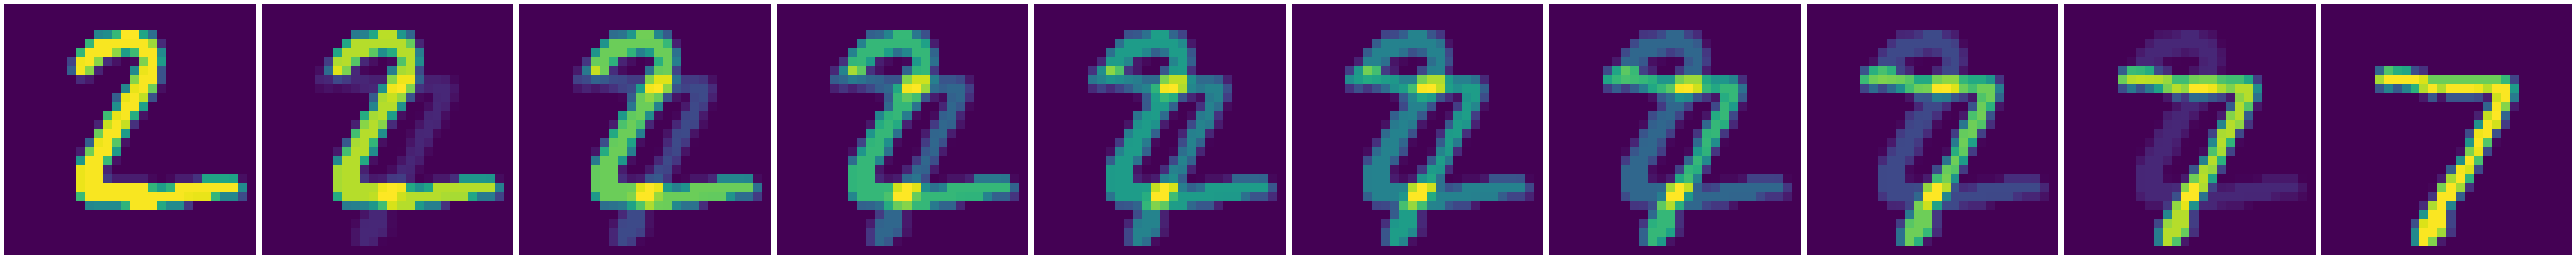

In [141]:
display_images([ x_testf[0]*i/10 + x_testf[1]*(9-i)/10 for i in range(10) ])

In [143]:
input_img = keras.Input(shape=(28,28,1))

x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Flatten()(x)
encoded = keras.layers.Dense(5,activation='relu')(x)
encoder = keras.models.Model(input_img,encoded)

encoder.summary()

latent = keras.Input(shape=(5,))

x = keras.layers.Dense(4*4*8,activation='relu')(latent)
x = keras.layers.Reshape((4,4,8))(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2),interpolation='bilinear')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2),interpolation='bilinear')(x)
x = keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = keras.layers.UpSampling2D((2, 2),interpolation='bilinear')(x)
decoded = keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

decoder = keras.models.Model(latent,decoded)
decoder.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_132 (Conv2D)         (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_133 (Conv2D)         (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_134 (Conv2D)         (None, 7, 7, 8)           584

In [145]:
autoencoder = keras.models.Model(input_img,decoder(encoder(input_img)))
autoencoder.compile('adam','binary_crossentropy')
autoencoder.fit(x_trainf, x_trainf,
                epochs=25,
                batch_size=128,
                shuffle=True)

Epoch 1/25
469/469 [==============================] - 60s 7ms/step - loss: 0.2727
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1984
Epoch 3/25
469/469 [==============================] - 4s 8ms/step - loss: 0.1889
Epoch 4/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1847
Epoch 5/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1824
Epoch 6/25
469/469 [==============================] - 4s 8ms/step - loss: 0.1807
Epoch 7/25
469/469 [==============================] - 4s 8ms/step - loss: 0.1794
Epoch 8/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1783
Epoch 9/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1774
Epoch 10/25
469/469 [==============================] - 4s 8ms/step - loss: 0.1768
Epoch 11/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1761
Epoch 12/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1755
Epoch 13/25
469/469 [===

1/1 [==============================] - 0s 256ms/step


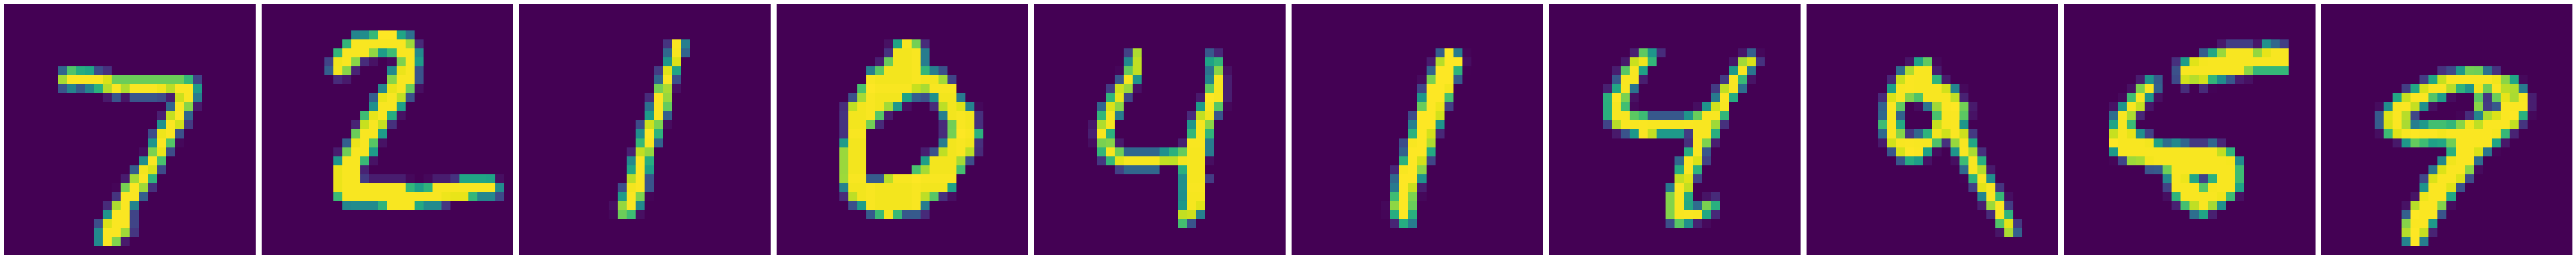

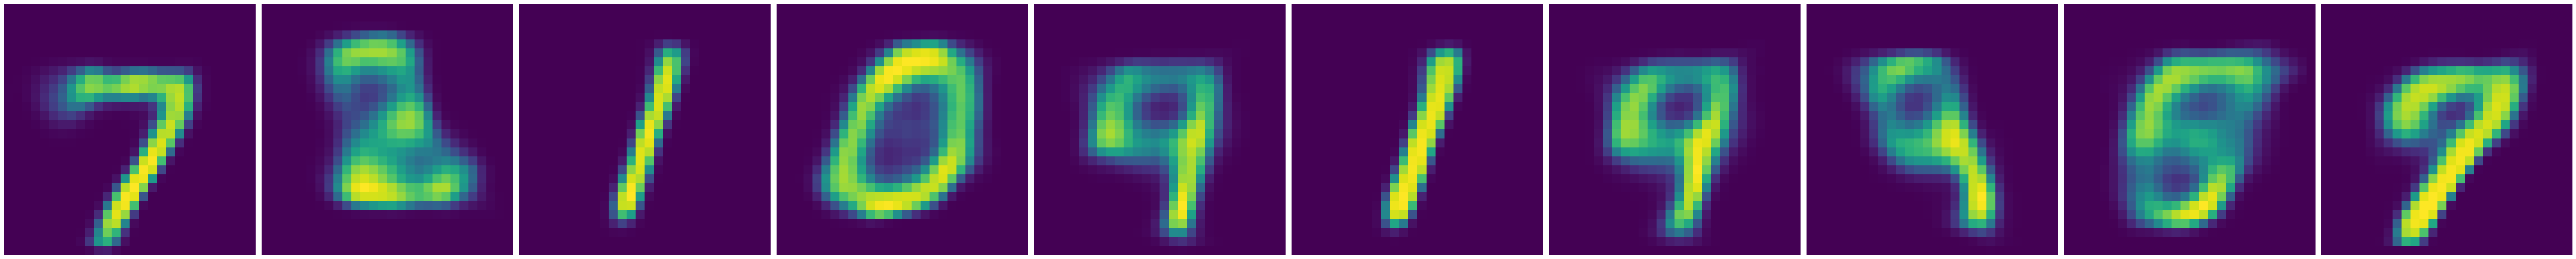

In [146]:
p_test = autoencoder.predict(x_testf[:10])
display_images(x_test[:10])
display_images(p_test[:10])

1/1 [==============================] - 0s 32ms/step


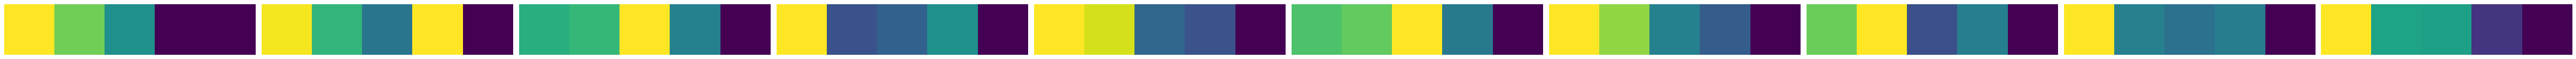

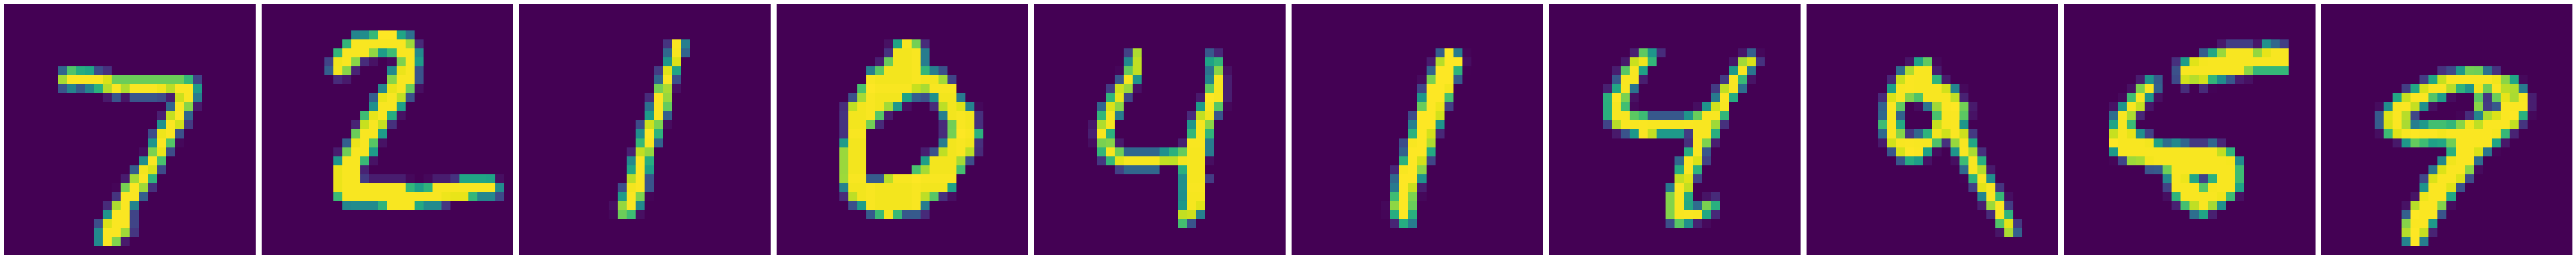

In [148]:
encoded_imgs = encoder.predict(x_testf[:10])
display_images(encoded_imgs.reshape(10,1,5))
display_images(x_testf[:10])

7/7 [==============================] - 0s 7ms/step


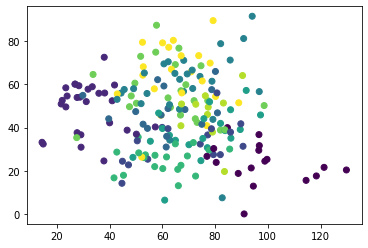

In [150]:
enc_test = encoder.predict(x_testf[:200])
plt.scatter(enc_test[:,0],enc_test[:,1],c=y_testclass[:200])

### Удаление шума

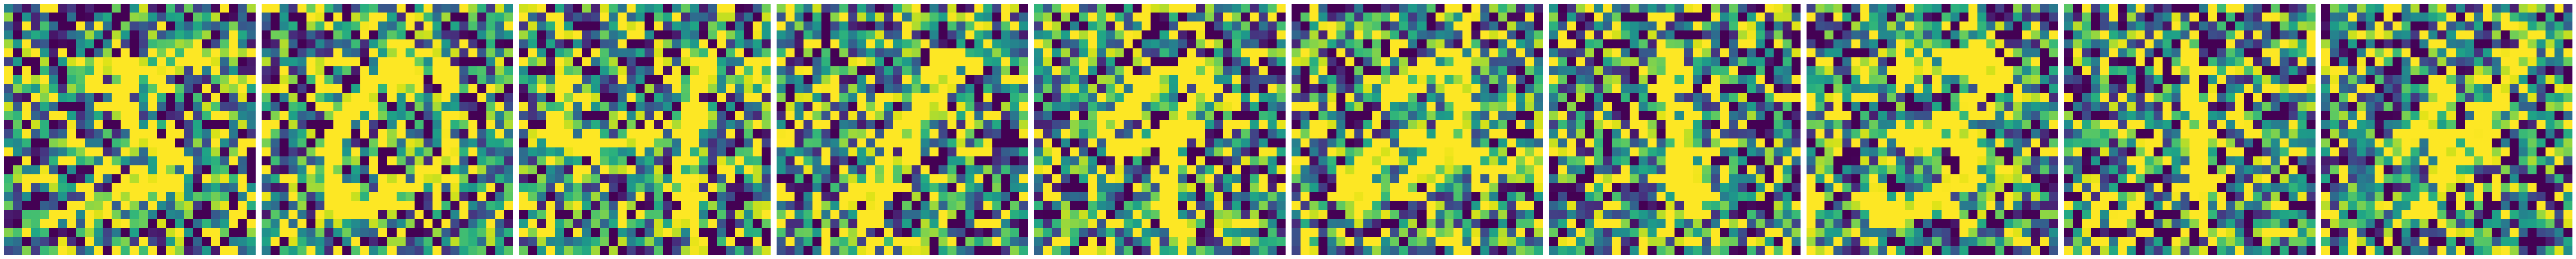

In [151]:
def noisify(data):
  return np.clip(data+np.random.normal(loc=0.5,scale=0.5,size=data.shape),0.,1.)

x_train_noise = noisify(x_trainf)
x_test_noise = noisify(x_testf)

display_images(x_train_noise[:10])

In [152]:
input_img = keras.Input(shape=(28,28,1))

x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

encoder = keras.models.Model(input_img,encoded)

latent = keras.Input(shape=(4,4,8))

x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(latent)
x = keras.layers.UpSampling2D((2, 2),interpolation='bilinear')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2),interpolation='bilinear')(x)
x = keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = keras.layers.UpSampling2D((2, 2),interpolation='bilinear')(x)
decoded = keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

decoder = keras.models.Model(latent,decoded)

autoencoder = keras.models.Model(input_img,decoder(encoder(input_img)))
autoencoder.compile('adam','binary_crossentropy')

In [153]:
autoencoder.fit(x_train_noise, x_trainf,
                epochs=25,
                batch_size=128,
                shuffle=True)

Epoch 1/25
469/469 [==============================] - 6s 7ms/step - loss: 0.2620
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1938
Epoch 3/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1786
Epoch 4/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1712
Epoch 5/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1667
Epoch 6/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1636
Epoch 7/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1611
Epoch 8/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1589
Epoch 9/25
469/469 [==============================] - 4s 8ms/step - loss: 0.1570
Epoch 10/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1550
Epoch 11/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1535
Epoch 12/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1523
Epoch 13/25
469/469 [====

1/1 [==============================] - 0s 82ms/step


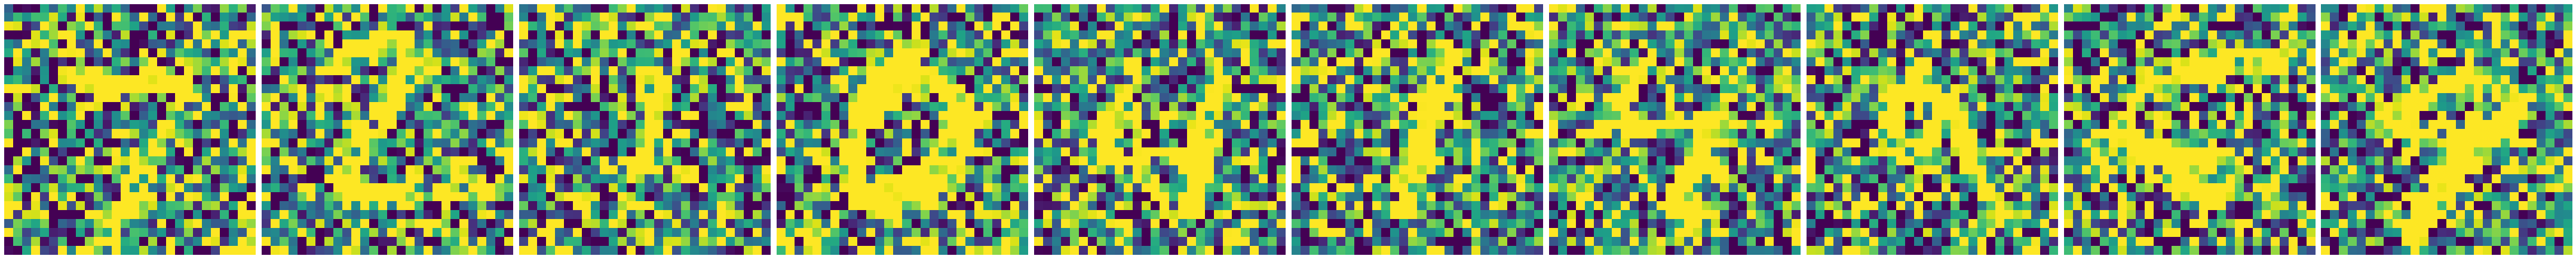

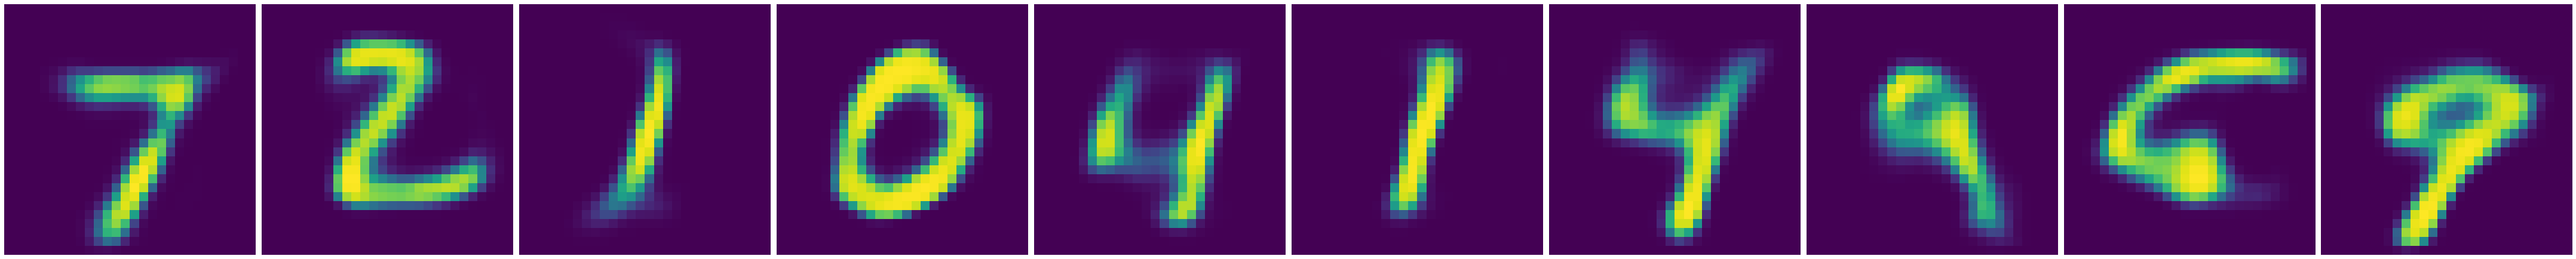

In [155]:
pred = autoencoder.predict(x_test_noise[:10])
display_images(x_test_noise[:10])
display_images(pred[:10])

(28, 28, 1)

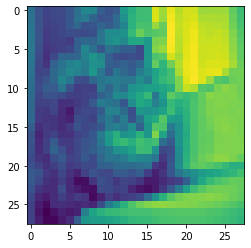

In [169]:
cat = np.expand_dims(np.array(Image.open('cat.jpg').resize((28,28)).convert('L')),axis=-1)/255.
plt.imshow(cat[...,0])
cat.shape

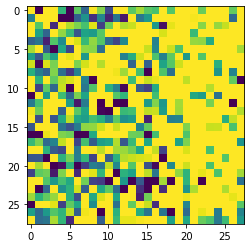

In [170]:
c = noisify(cat)
plt.imshow(c[:,:,0])

1/1 [==============================] - 0s 32ms/step


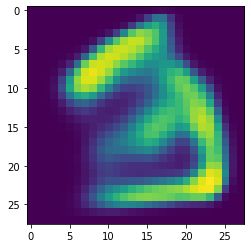

In [173]:
pred = autoencoder.predict(np.expand_dims(c,0))
plt.imshow(pred[0])

## Super-resolution

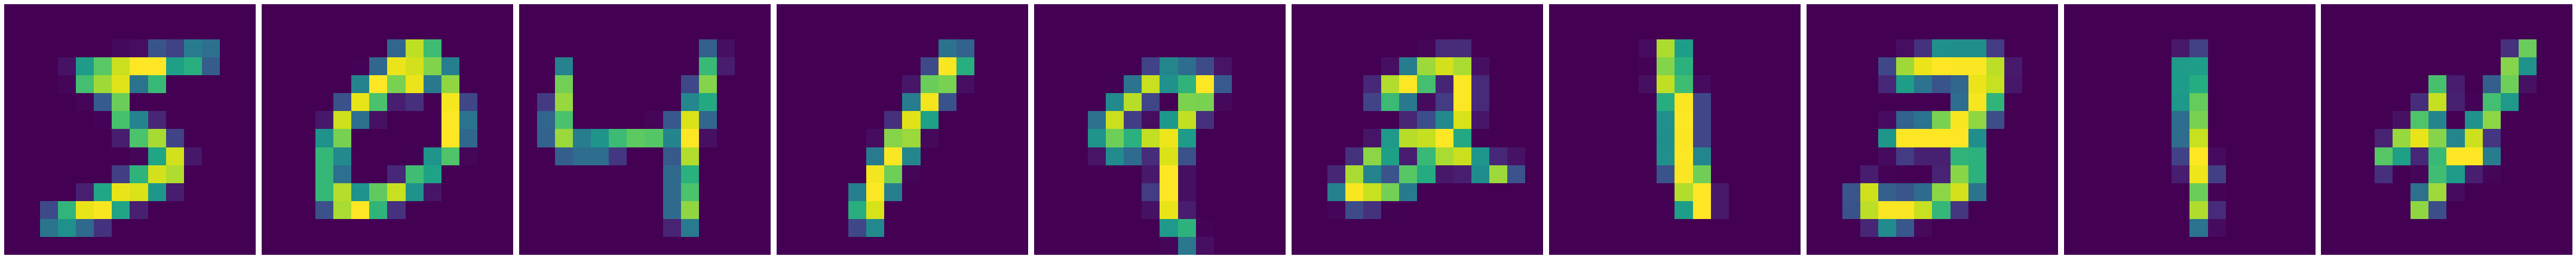

In [174]:
x_train_lr = tf.keras.layers.AveragePooling2D()(x_trainf).numpy()
x_test_lr = tf.keras.layers.AveragePooling2D()(x_testf).numpy()
display_images(x_train_lr[:10])

In [178]:
input_img = keras.Input(shape=(14,14,1))

x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

encoder = keras.models.Model(input_img,encoded)

latent = keras.Input(shape=(4,4,8))

x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(latent)
x = keras.layers.UpSampling2D((2, 2),interpolation='bilinear')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2),interpolation='bilinear')(x)
x = keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = keras.layers.UpSampling2D((2, 2),interpolation='bilinear')(x)
decoded = keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

decoder = keras.models.Model(latent,decoded)

autoencoder = keras.models.Model(input_img,decoder(encoder(input_img)))
autoencoder.compile('adam','binary_crossentropy')

In [179]:
autoencoder.fit(x_train_lr, x_trainf,
                epochs=25,
                batch_size=128,
                shuffle=True)

Epoch 1/25
469/469 [==============================] - 5s 6ms/step - loss: 0.2339
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1563
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1439
Epoch 4/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1368
Epoch 5/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1323
Epoch 6/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1287
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1259
Epoch 8/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1234
Epoch 9/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1215
Epoch 10/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1198
Epoch 11/25
469/469 [==============================] - 3s 7ms/step - loss: 0.1185
Epoch 12/25
469/469 [==============================] - 3s 6ms/step - loss: 0.1173
Epoch 13/25
469/469 [====

1/1 [==============================] - 1s 517ms/step


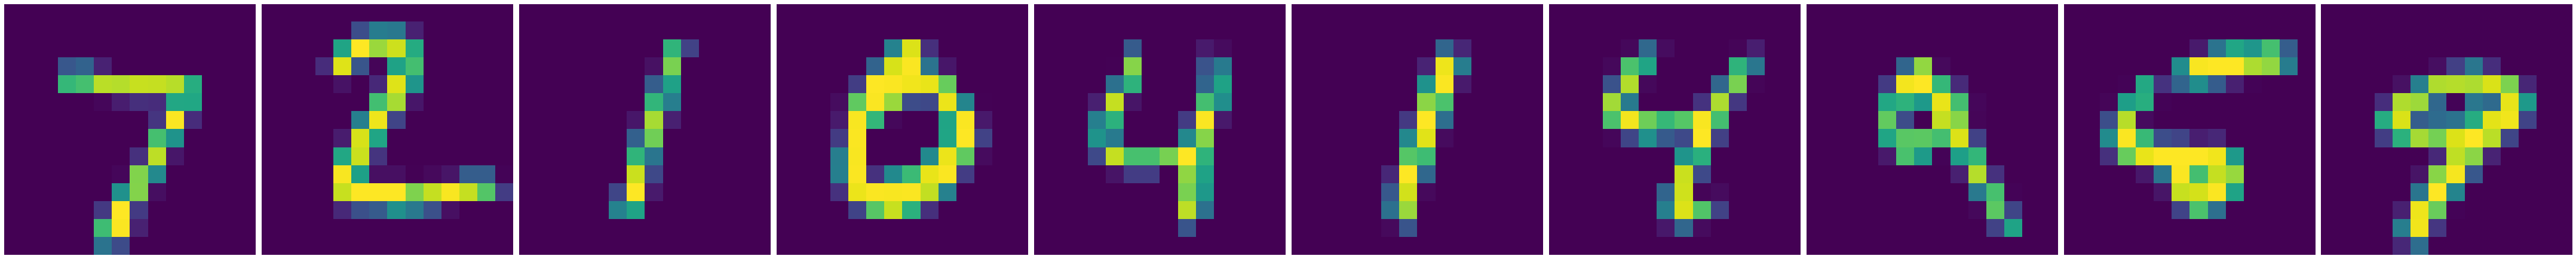

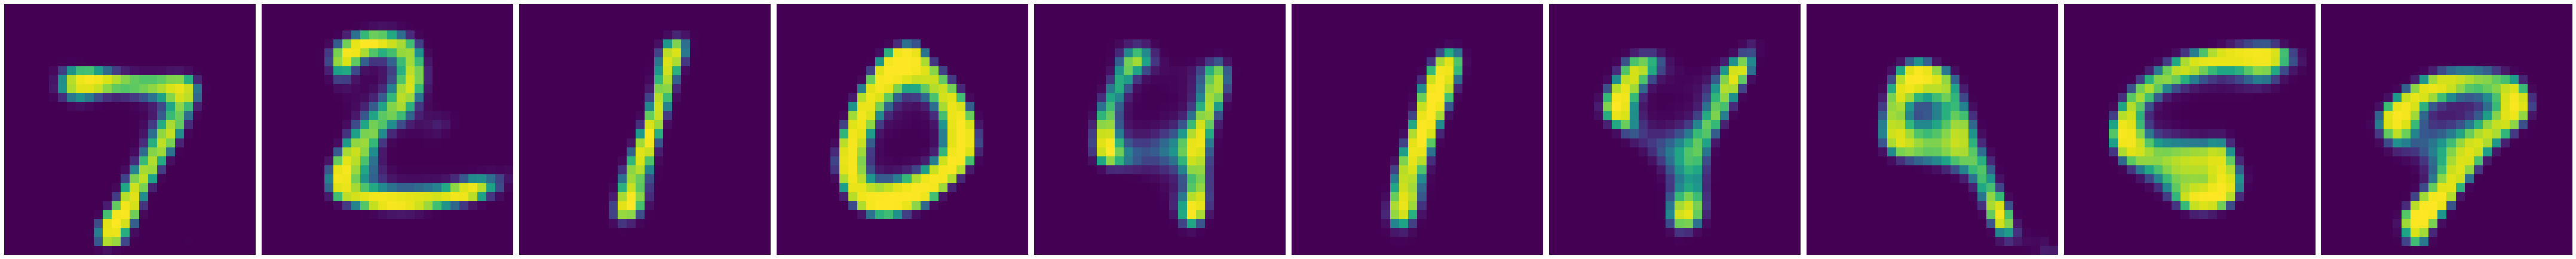

In [180]:
pred = autoencoder.predict(x_test_lr[:10])
display_images(x_test_lr[:10])
display_images(pred[:10])

## Variational Autoencoder

In [19]:
tf.compat.v1.disable_eager_execution()

input = keras.Input(shape=(28,28,1))
x = keras.layers.Flatten()(input)
h = keras.layers.Dense(512,activation='relu')(x)
z_mean = keras.layers.Dense(2)(h)
z_log_sigma = keras.layers.Dense(2)(h)

@tf.function
def sampling(args):
    z_mean, z_log_sigma = args
    bs = tf.shape(z_mean)[0]
    epsilon = tf.random.normal(shape=(bs, 2))
    return z_mean + tf.exp(z_log_sigma) * epsilon

z = keras.layers.Lambda(sampling)([z_mean,z_log_sigma])

encoder = keras.models.Model(input, [z_mean, z_log_sigma, z])


In [20]:
latent_inputs = keras.Input(shape=(2,))
x = keras.layers.Dense(512, activation='relu')(latent_inputs)
x = keras.layers.Dense(784, activation='sigmoid')(x)
outputs = keras.layers.Reshape((28,28,1))(x)
decoder = keras.models.Model(latent_inputs, outputs)

outs = decoder(encoder(input)[2])
vae = keras.models.Model(input, outs)

In [23]:
@tf.function
def vae_loss(x1,x2):
  x1 = keras.layers.Flatten()(x1)
  x2 = keras.layers.Flatten()(x2)
  reconstruction_loss = keras.losses.mse(x1,x2)*784
  tmp = 1 + z_log_sigma - tf.square(z_mean) - tf.exp(z_log_sigma)
  kl_loss = -0.5*tf.reduce_sum(tmp, axis=-1)
  return tf.convert_to_tensor(tf.reduce_mean(reconstruction_loss + kl_loss))

vae.compile(optimizer='rmsprop', loss=vae_loss)


In [24]:
vae.fit(x_trainf, x_trainf,
                epochs=25,
                batch_size=128,
                shuffle=True)

Train on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 2s 35us/sample - loss: 48.4858
Epoch 2/25
60000/60000 [==============================] - 2s 28us/sample - loss: 41.4269
Epoch 3/25
60000/60000 [==============================] - 2s 29us/sample - loss: 40.3354
Epoch 4/25
60000/60000 [==============================] - 2s 33us/sample - loss: 39.5681
Epoch 5/25
60000/60000 [==============================] - 2s 35us/sample - loss: 38.9501
Epoch 6/25
60000/60000 [==============================] - 2s 29us/sample - loss: 38.4391
Epoch 7/25
60000/60000 [==============================] - 2s 30us/sample - loss: 38.0440
Epoch 8/25
60000/60000 [==============================] - 2s 29us/sample - loss: 37.7313
Epoch 9/25
60000/60000 [==============================] - 2s 29us/sample - loss: 37.4470
Epoch 10/25
60000/60000 [==============================] - 2s 28us/sample - loss: 37.2211
Epoch 11/25
60000/60000 [==============================] - 2s 35us/sample - loss: 37.0

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


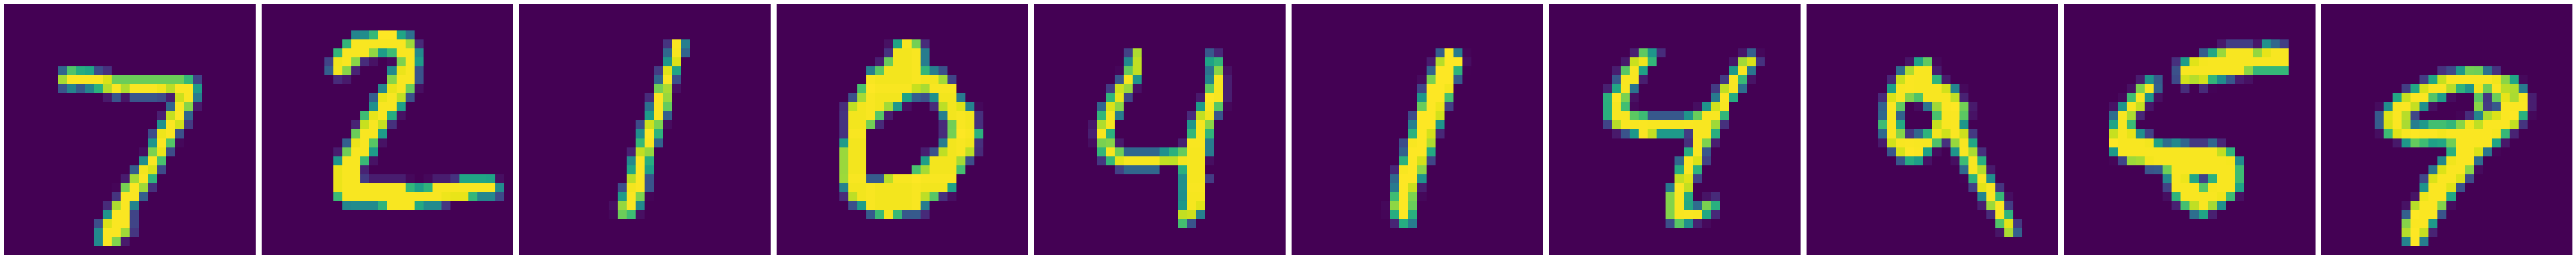

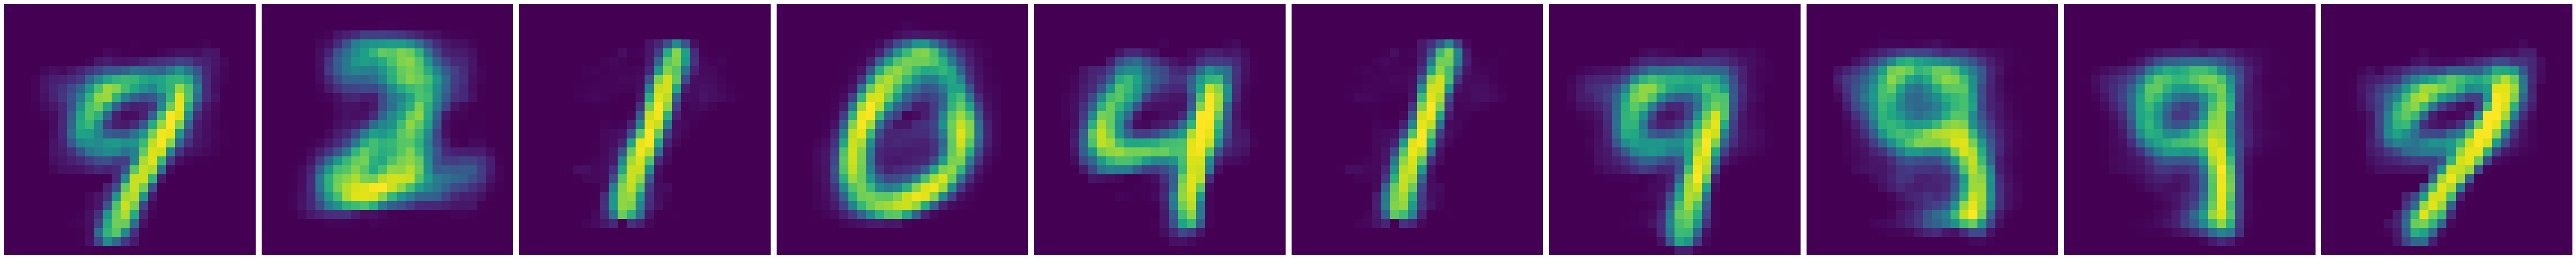

In [25]:
pred = vae.predict(x_testf[:10])
display_images(x_testf[:10])
display_images(pred[:10])

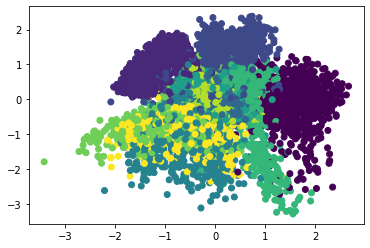

In [27]:
enc_test = encoder.predict(x_testf)[0]
plt.scatter(enc_test[:,0],enc_test[:,1],c=y_testclass)

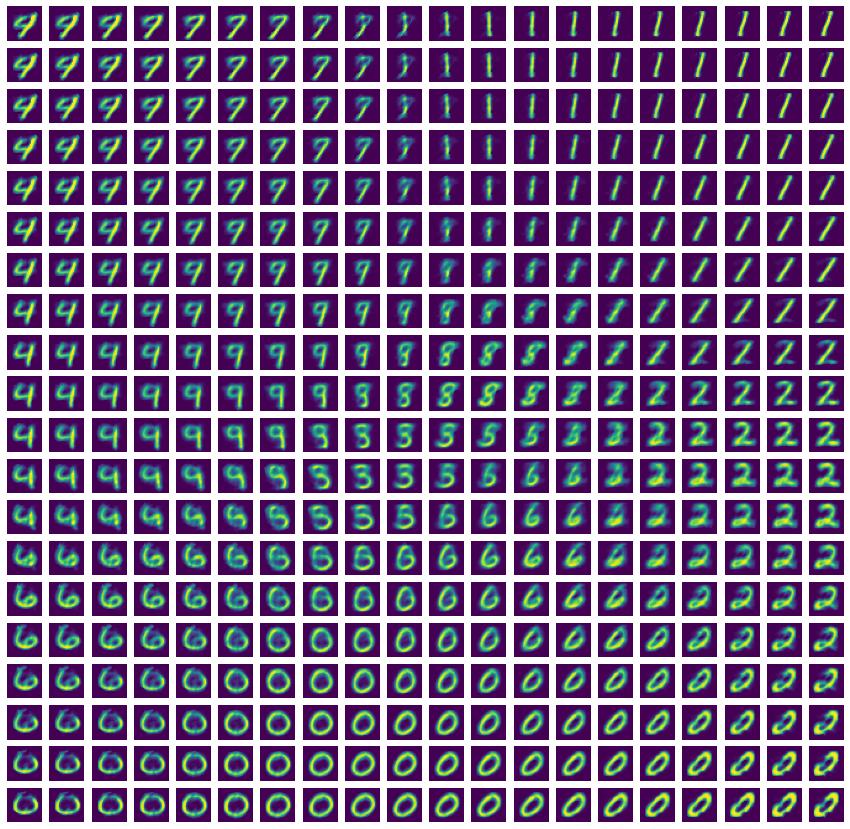

In [32]:
def plotsample(n):
  dx = np.linspace(-2,2,n)
  dy = np.linspace(-2,2,n)
  fig,ax = plt.subplots(n,n,figsize=(15,15))
  for i,xi in enumerate(dx):
    for j,xj in enumerate(dy):
      res = decoder.predict(np.array([xi,xj]).reshape(-1,2))[0]
      ax[i,j].imshow(res.reshape(28,28))
      ax[i,j].axis('off')
  plt.show()
  
plotsample(20)

## GANs

In [8]:
from keras.layers import Conv2D, LeakyReLU, ZeroPadding2D, BatchNormalization,Dropout,Flatten,Dense
from keras.models import Sequential

discriminator = Sequential()

discriminator.add(Conv2D(32, kernel_size=3, strides=2, input_shape=(28,28,1), padding="same"))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
discriminator.add(ZeroPadding2D(padding=((0,1),(0,1))))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.legacy.Adam(0.0001)

discriminator.compile(loss='binary_crossentropy',optimizer=optimizer)

In [9]:
from keras.layers import Reshape, UpSampling2D, Conv2DTranspose, Activation

generator = Sequential()
generator.add(Dense(128 * 7 * 7, activation="relu", input_dim=100))
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2DTranspose(128, kernel_size=3, padding="same"))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Activation("relu"))
generator.add(UpSampling2D())
generator.add(Conv2DTranspose(64, kernel_size=3, padding="same"))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Activation("relu"))
generator.add(Conv2DTranspose(1, kernel_size=3, padding="same"))
generator.add(Activation("tanh"))

generator.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [10]:
discriminator.trainable = False
adversarial = Sequential()
adversarial.add(generator)
adversarial.add(discriminator)
adversarial.compile(loss='binary_crossentropy', optimizer=optimizer)

1/1 [==============================] - 1s 525ms/step
epoch: 0, [Discriminator :: d_loss: 0.867166], [ Generator :: loss: 0.697738]
1/1 [==============================] - 0s 180ms/step


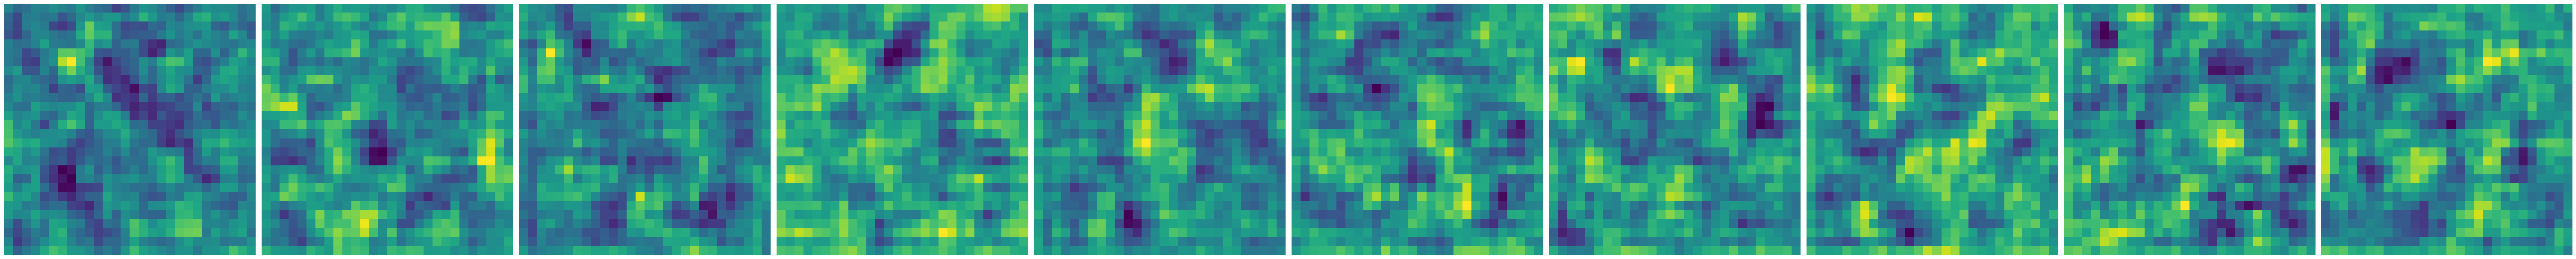

1/1 [==============================] - 0s 22ms/step
epoch: 100, [Discriminator :: d_loss: 0.760811], [ Generator :: loss: 1.404838]
1/1 [==============================] - 0s 20ms/step


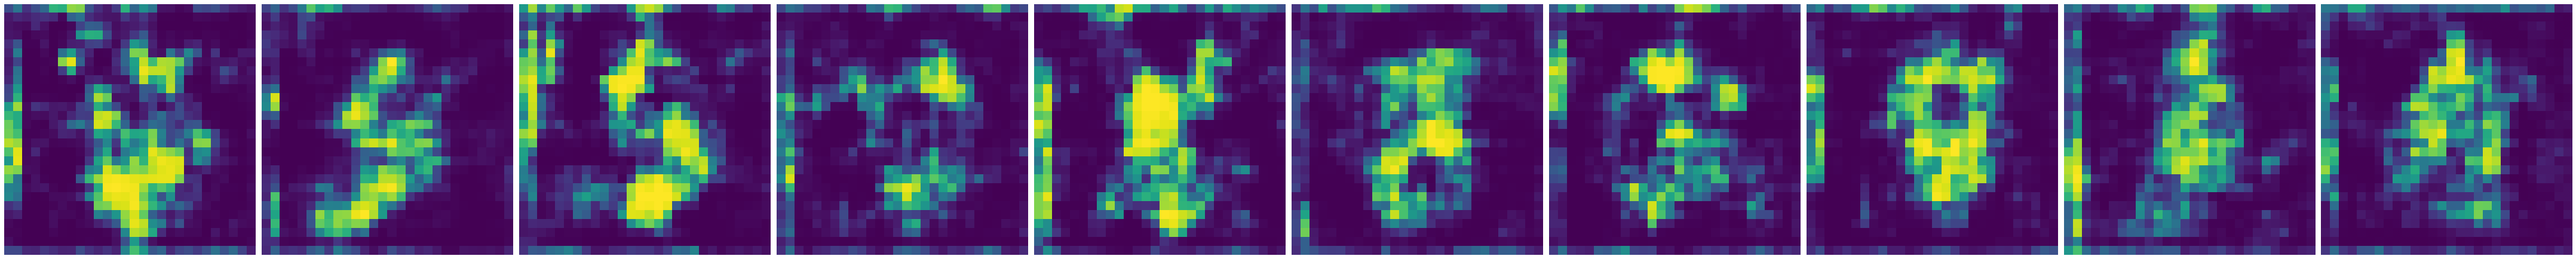

1/1 [==============================] - 0s 16ms/step
epoch: 200, [Discriminator :: d_loss: 0.855326], [ Generator :: loss: 0.897157]
1/1 [==============================] - 0s 18ms/step


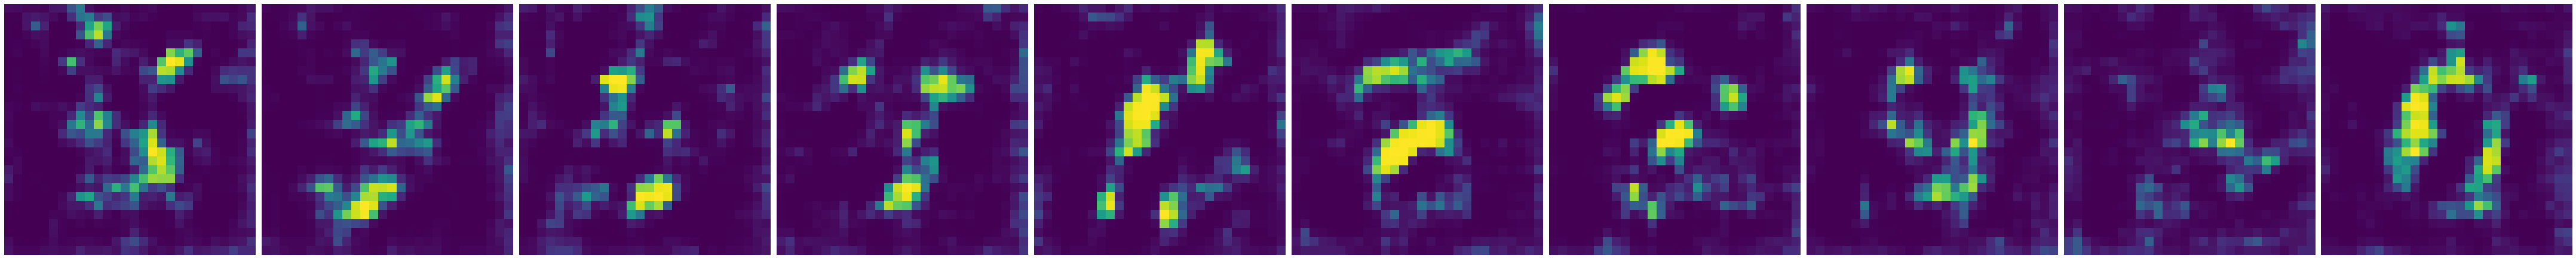

1/1 [==============================] - 0s 25ms/step
epoch: 300, [Discriminator :: d_loss: 0.590585], [ Generator :: loss: 1.102926]
1/1 [==============================] - 0s 26ms/step


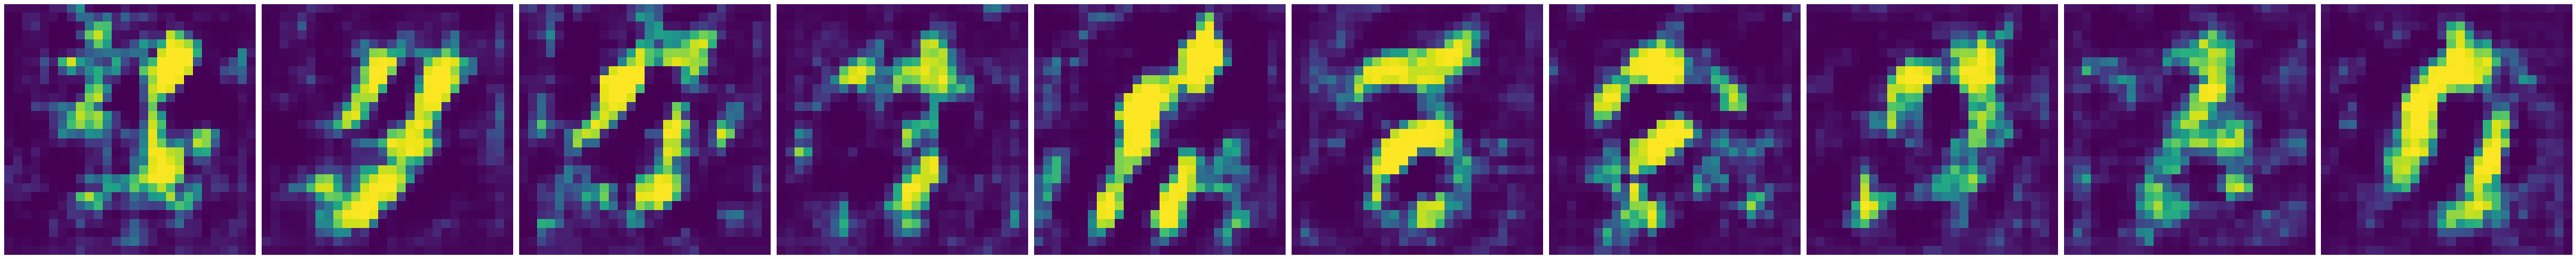

1/1 [==============================] - 0s 16ms/step
epoch: 400, [Discriminator :: d_loss: 0.497208], [ Generator :: loss: 1.035602]
1/1 [==============================] - 0s 22ms/step


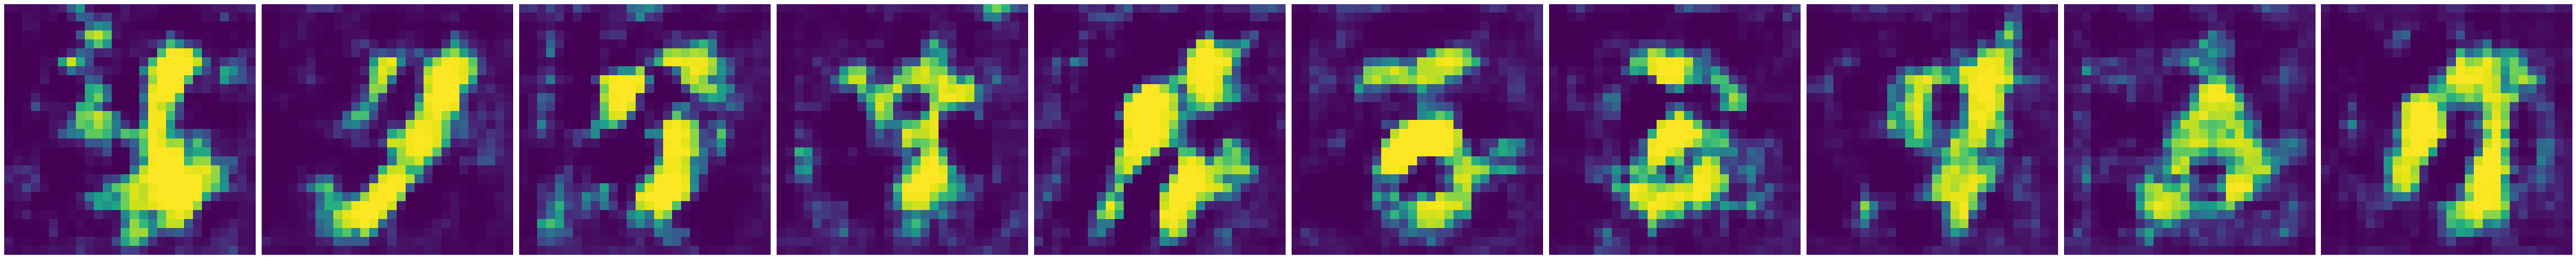

1/1 [==============================] - 0s 21ms/step
epoch: 500, [Discriminator :: d_loss: 0.516531], [ Generator :: loss: 1.386003]
1/1 [==============================] - 0s 21ms/step


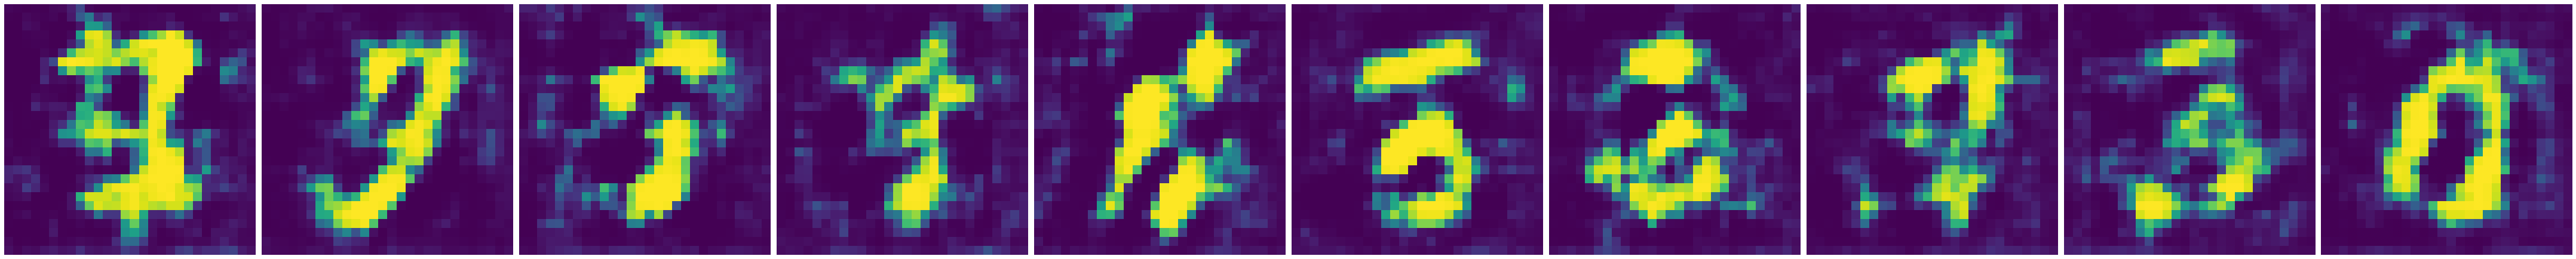

1/1 [==============================] - 0s 18ms/step
epoch: 600, [Discriminator :: d_loss: 0.447027], [ Generator :: loss: 0.980462]
1/1 [==============================] - 0s 18ms/step


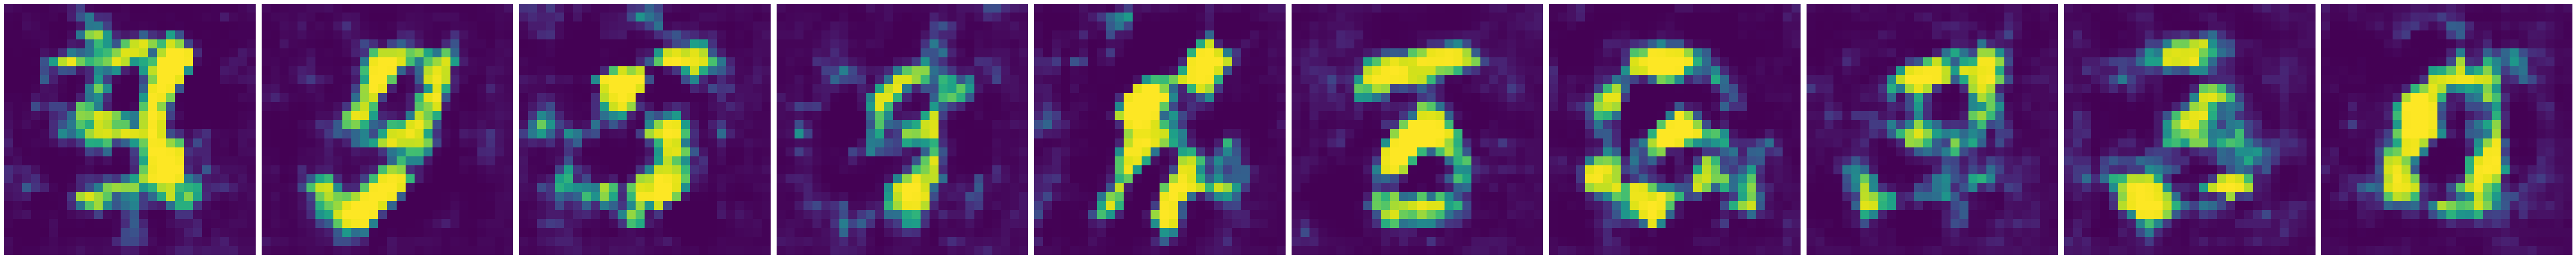

1/1 [==============================] - 0s 17ms/step
epoch: 700, [Discriminator :: d_loss: 0.414085], [ Generator :: loss: 0.887167]
1/1 [==============================] - 0s 20ms/step


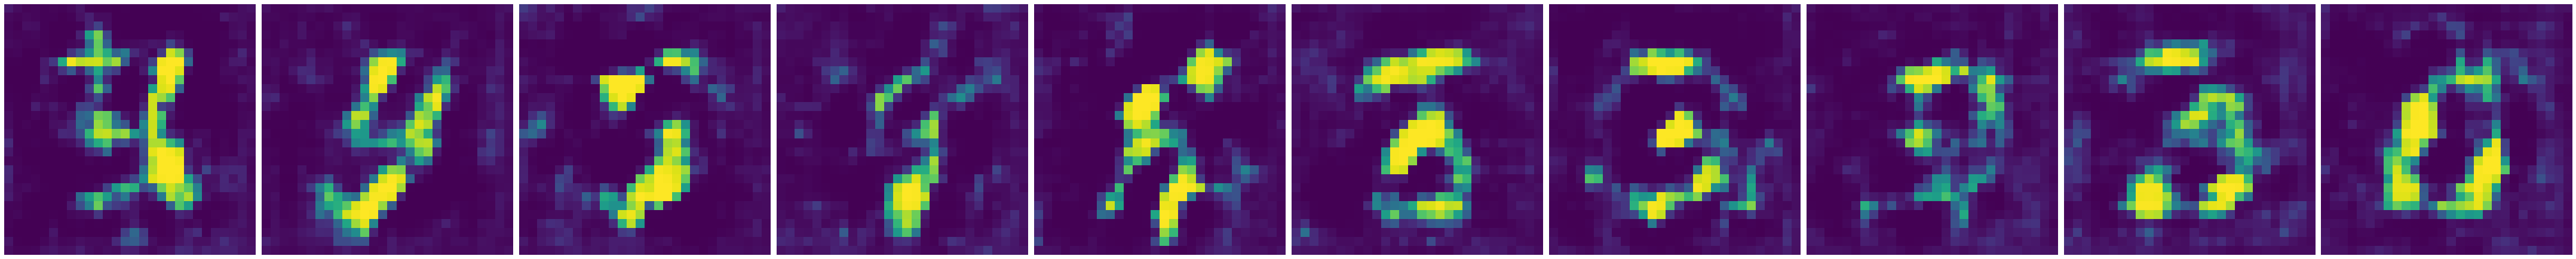

1/1 [==============================] - 0s 19ms/step
epoch: 800, [Discriminator :: d_loss: 0.425303], [ Generator :: loss: 1.000678]
1/1 [==============================] - 0s 18ms/step


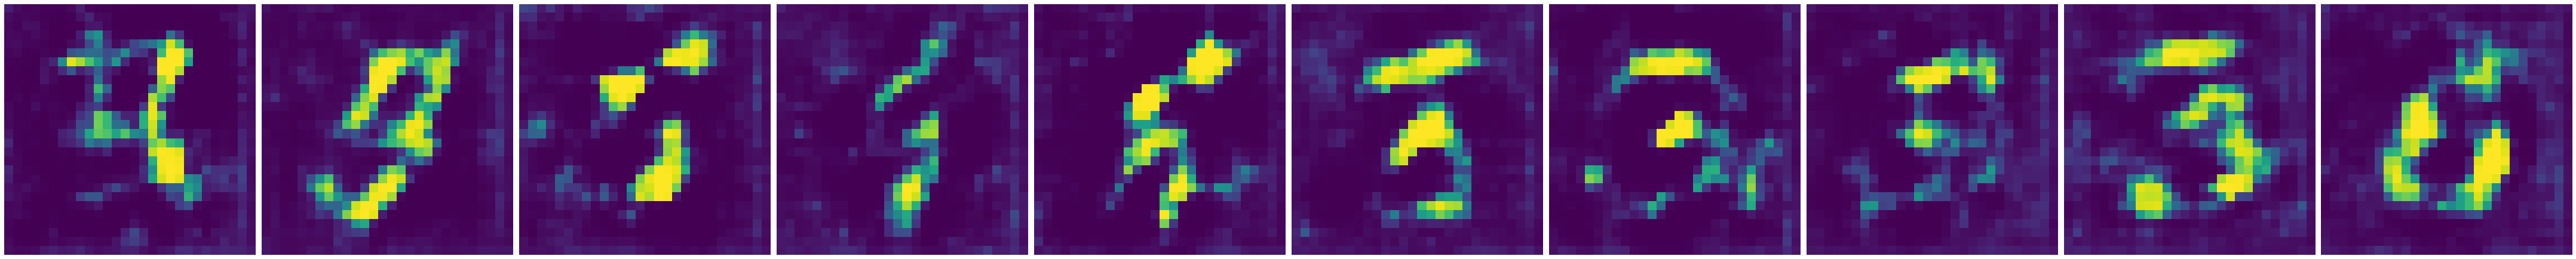

1/1 [==============================] - 0s 17ms/step
epoch: 900, [Discriminator :: d_loss: 0.541688], [ Generator :: loss: 0.900254]
1/1 [==============================] - 0s 18ms/step


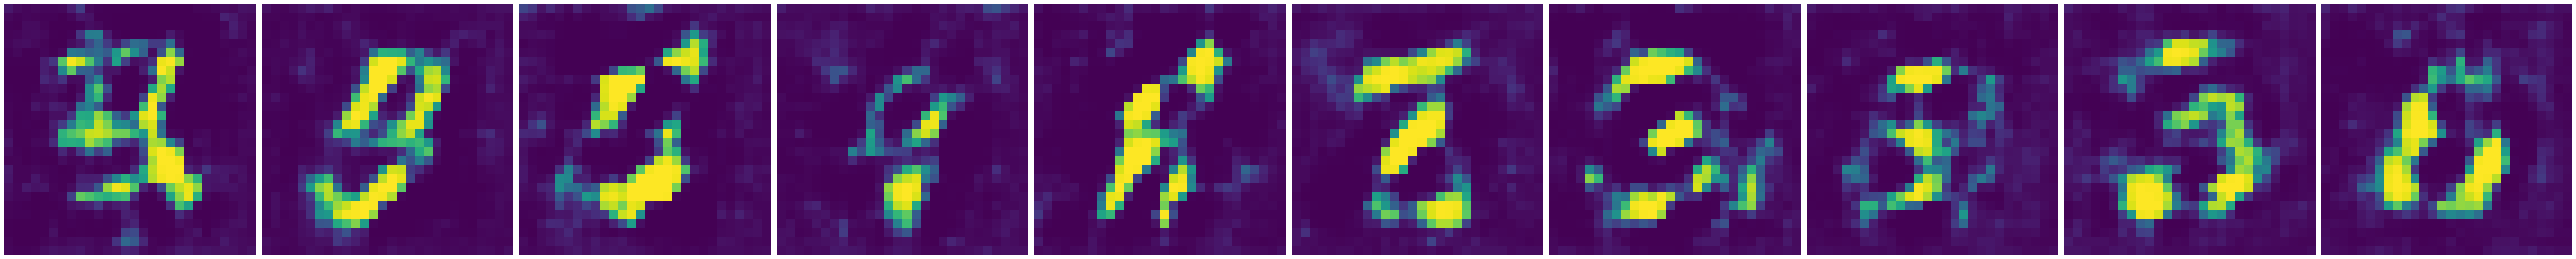

1/1 [==============================] - 0s 18ms/step


In [11]:
X_train = x_trainf*2.0-1.0

batch=32

y_labeled = np.ones((batch, 1))
y_mislabeled = np.zeros((batch, 1))
sample_noise = np.random.normal(0,1,(10,100))
for cnt in range(1000):
## train discriminator
  random_index =  np.random.randint(0, len(X_train) - batch)
  legit_images = X_train[random_index : random_index + batch].reshape(batch, 28, 28, 1)
  gen_noise = np.random.normal(0, 1, (batch,100))
  syntetic_images = generator.predict(gen_noise)
  d_loss_1 = discriminator.train_on_batch(legit_images, y_labeled)
  d_loss_2 = discriminator.train_on_batch(syntetic_images, y_mislabeled)
  d_loss = 0.5*np.add(d_loss_1,d_loss_2)
# train generator
  g_loss = adversarial.train_on_batch(gen_noise, y_labeled)
  if cnt%100==0:
    print ('epoch: %d, [Discriminator :: d_loss: %f], [ Generator :: loss: %f]' % (cnt, d_loss, g_loss))
    imgs = generator.predict(sample_noise)
    display_images(imgs)